<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    
</div>


# **Laboratorio 4: Analisis y visualización de Datos**
<br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Fernando Becerra </em><br>
    
**Estudiantes**  
César Godoy Delaigue - Pablo Madariaga Orellana - Cristhian Solis Muñoz

### **Introducción**

Este análisis tiene como objetivo visualizar y entender la relación espacial entre la temperatura máxima y la precipitación en distintas estaciones meteorológicas ubicadas en la Región de Coquimbo. Utilizando datos de monitoreo ambiental de diversas estaciones, se busca generar un **mapa bivariado** que combine ambas variables para analizar cómo varían conjuntamente en el espacio.

### **Objetivos**
1. **Visualizar los puntos de monitoreo** en el mapa junto con los límites geográficos de la Región de Coquimbo.
2. **Calcular y analizar estadísticas descriptivas** de las variables de temperatura máxima y precipitación.
3. **Clasificar los datos en cuantiles** para ambas variables, de manera que se pueda generar una representación bivariada en el mapa.
4. **Generar un mapa bivariado** que permita visualizar la relación entre las clases de temperatura y precipitación en las diferentes estaciones meteorológicas.
5. **Interpretar los resultados** obtenidos a partir de la visualización y análisis de los datos espaciales.

### **Fuente de datos**
- **Datos meteorológicos**: Estos incluyen valores diarios de temperatura máxima (°C) y precipitación (mm) registrados en diversas estaciones de monitoreo dentro de la Región de Coquimbo.

https://climatologia.meteochile.gob.cl/


- **Shapefile geográfico**: Límites geográficos de la Región de Coquimbo, utilizados para situar espacialmente las estaciones y generar las visualizaciones necesarias.

https://www.bcn.cl/siit/mapas_vectoriales/index_html

### **Metodología**
1. **Preprocesamiento de los datos**: Normalización y verificación de los valores extremos.
2. **Análisis estadístico**: Cálculo de estadísticas descriptivas para cada variable con el fin de comprender su distribución.
3. **Clasificación bivariada**: Utilización de **cuantiles** para dividir los datos de temperatura y precipitación en clases.
4. **Visualización**: Creación de un **mapa bivariado** que muestre la relación espacial entre ambas variables.

### **Herramientas**
- **Python**: Para la manipulación de los datos y la creación de visualizaciones.
- **GeoPandas**: Para trabajar con datos geoespaciales y realizar uniones espaciales entre las estaciones meteorológicas y los límites geográficos.
- **Matplotlib**: Para graficar los resultados y generar mapas.

### **Descripción del Dataset**

El dataset utilizado en este análisis contiene información de estaciones meteorológicas que monitorean temperatura y precipitación en la Región de Coquimbo. A continuación se detallan las columnas del dataset y su estructura.

### **Estructura del Dataset**
- **Número de registros**: 526,430
- **Número de columnas**: 7

### **Columnas del Dataset**

| Nombre de variable   | Tipo de dato      | Descripción                                                               |
|----------------------|-------------------|---------------------------------------------------------------------------|
| Estacion             | object            | Nombre de la estación meteorológica donde se realizaron las mediciones. No contiene valores nulos. |
| lat                  | float64           | Latitud de la ubicación geográfica de la estación. No contiene valores nulos. |
| long                 | float64           | Longitud de la ubicación geográfica de la estación. No contiene valores nulos. |
| Fecha                | object      | Fecha de la medición registrada, desde 1960 a 2024. No contiene valores nulos. |
| Valor_T_max         | float64           | Valor de la temperatura máxima (°C) registrada en la estación para el día correspondiente. Contiene 64,003 valores no nulos. |
| Valor_T_min         | float64           | Valor de la temperatura mínima (°C) registrada en la estación para el día correspondiente. Contiene 64,512 valores no nulos. |
| Valor_Pp_mm         | float64           | Valor de la precipitación (mm) registrada en la estación para el día correspondiente. Contiene 292,235 valores no nulos. |


### **Notas sobre los Datos**
- Las columnas de temperatura y precipitación contienen valores nulos debido a la falta de registros en algunas estaciones o días específicos.
- Las columnas de latitud y longitud permiten ubicar espacialmente las estaciones en un mapa geográfico, lo que facilita la visualización espacial de los datos.


### **Desarollo**

In [342]:
# Importación de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import xlrd
import pyodbc
import sqlalchemy
import unicodedata
import openpyxl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from shapely.geometry import Point
from sklearn.impute import KNNImputer
import contextily as ctx
import geopandas as gpd

### **1. Exploración de Datos (EDA)**

**1.1 Carga de los datos**

Cargamos el dataset y verificamos la estructura de los datos.

In [343]:
# Declaraciónb del DF
ruta = r"C:\Entorno_Desarrollo_UDD\Visualizacion_de_la_Informacion\notebook\Tareas\DataSet_metereologia.csv"
df_importa_data = pd.read_csv(ruta, sep=',', encoding='utf-8')  
print(df_importa_data.head())

     Estacion        lat       long       Fecha  Valor_T_max  Valor_T_min  \
0  AgroChacay -31.863935 -70.616477  1998-02-08          NaN          NaN   
1  AgroChacay -31.863935 -70.616477  1998-03-29          NaN          NaN   
2  AgroChacay -31.863935 -70.616477  1998-04-14          NaN          NaN   
3  AgroChacay -31.863935 -70.616477  1998-04-24          NaN          NaN   
4  AgroChacay -31.863935 -70.616477  1998-05-18          NaN          NaN   

   Valor_Pp_mm  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


In [344]:
df_importa_data.columns 

Index(['Estacion', 'lat', 'long', 'Fecha', 'Valor_T_max', 'Valor_T_min',
       'Valor_Pp_mm'],
      dtype='object')

In [345]:
df_importa_data.shape

(526430, 7)

In [346]:
df_importa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526430 entries, 0 to 526429
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Estacion     526430 non-null  object 
 1   lat          526430 non-null  float64
 2   long         526430 non-null  float64
 3   Fecha        526430 non-null  object 
 4   Valor_T_max  64003 non-null   float64
 5   Valor_T_min  64512 non-null   float64
 6   Valor_Pp_mm  292235 non-null  float64
dtypes: float64(5), object(2)
memory usage: 28.1+ MB


* Cálculo de Coordenadas Geométricas

***Código importa la clase Point del módulo shapely.geometry y luego calcula una nueva columna llamada 'geometry_point' en el DataFrame df_importa_data. Esta nueva columna contiene objetos Point que representan las coordenadas geográficas basadas en las columnas 'long' y 'lat' del DataFrame.***

In [347]:
# Calculate the 'Coordenadas' column as a geometry point
df_importa_data['Coordenadas'] = df_importa_data.apply(lambda row: Point(row['long'], row['lat']), axis=1)
print(df_importa_data.head())

     Estacion        lat       long       Fecha  Valor_T_max  Valor_T_min  \
0  AgroChacay -31.863935 -70.616477  1998-02-08          NaN          NaN   
1  AgroChacay -31.863935 -70.616477  1998-03-29          NaN          NaN   
2  AgroChacay -31.863935 -70.616477  1998-04-14          NaN          NaN   
3  AgroChacay -31.863935 -70.616477  1998-04-24          NaN          NaN   
4  AgroChacay -31.863935 -70.616477  1998-05-18          NaN          NaN   

   Valor_Pp_mm                                    Coordenadas  
0          NaN  POINT (-70.61647709322419 -31.86393477004859)  
1          NaN  POINT (-70.61647709322419 -31.86393477004859)  
2          NaN  POINT (-70.61647709322419 -31.86393477004859)  
3          NaN  POINT (-70.61647709322419 -31.86393477004859)  
4          NaN  POINT (-70.61647709322419 -31.86393477004859)  


In [348]:
df_importa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526430 entries, 0 to 526429
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Estacion     526430 non-null  object 
 1   lat          526430 non-null  float64
 2   long         526430 non-null  float64
 3   Fecha        526430 non-null  object 
 4   Valor_T_max  64003 non-null   float64
 5   Valor_T_min  64512 non-null   float64
 6   Valor_Pp_mm  292235 non-null  float64
 7   Coordenadas  526430 non-null  object 
dtypes: float64(5), object(3)
memory usage: 32.1+ MB


In [349]:
# Modificación de formato e investigación de temporalidad
df_importa_data['Fecha'] = pd.to_datetime(df_importa_data['Fecha'])
fecha_min = df_importa_data['Fecha'].min()
fecha_max = df_importa_data['Fecha'].max()
print(f"Rango de fechas disponible: {fecha_min.strftime('%d %B %Y')} - {fecha_max.strftime('%d %B %Y')}")


Rango de fechas disponible: 01 January 1960 - 30 April 2024


In [350]:
df_importa_data.isnull().sum()

Estacion            0
lat                 0
long                0
Fecha               0
Valor_T_max    462427
Valor_T_min    461918
Valor_Pp_mm    234195
Coordenadas         0
dtype: int64

**1.2 Tratamiento de Valores Faltantes**

Dado la exploración y verificación de la cantidad de valores nulos para determinar si necesitamos imputar o eliminar valores faltantes.

In [351]:
# Calculo de valores nulos
df_importa_data['Fecha'] = pd.to_datetime(df_importa_data['Fecha'])
df_importa_data['Año'] = df_importa_data['Fecha'].dt.year
df_importa_data['Mes'] = df_importa_data['Fecha'].dt.month
total_por_grupo = df_importa_data.groupby(['Año', 'Mes']).size().reset_index(name='Total')

# Agrupación de % de valores nulos por variable
nulos_valor_max = df_importa_data.groupby(['Año', 'Mes'])['Valor_T_max'].apply(lambda x: x.isnull().sum()).reset_index()
nulos_valor_max = nulos_valor_max.merge(total_por_grupo, on=['Año', 'Mes'])
nulos_valor_max['Porcentaje_Valor_T_max'] = (nulos_valor_max['Valor_T_max'] / nulos_valor_max['Total']) * 100
pivot_valor_max = nulos_valor_max.pivot_table(index='Año', columns='Mes', values='Porcentaje_Valor_T_max', fill_value=0)

nulos_valor_min = df_importa_data.groupby(['Año', 'Mes'])['Valor_T_min'].apply(lambda x: x.isnull().sum()).reset_index()
nulos_valor_min = nulos_valor_min.merge(total_por_grupo, on=['Año', 'Mes'])
nulos_valor_min['Porcentaje_Valor_T_min'] = (nulos_valor_min['Valor_T_min'] / nulos_valor_min['Total']) * 100
pivot_valor_min = nulos_valor_min.pivot_table(index='Año', columns='Mes', values='Porcentaje_Valor_T_min', fill_value=0)

nulos_valor_Pp_mm = df_importa_data.groupby(['Año', 'Mes'])['Valor_Pp_mm'].apply(lambda x: x.isnull().sum()).reset_index()
nulos_valor_Pp_mm = nulos_valor_Pp_mm.merge(total_por_grupo, on=['Año', 'Mes'])
nulos_valor_Pp_mm['Porcentaje_Valor_Pp_mm'] = (nulos_valor_Pp_mm['Valor_Pp_mm'] / nulos_valor_Pp_mm['Total']) * 100
pivot_valor_Pp_mm = nulos_valor_Pp_mm.pivot_table(index='Año', columns='Mes', values='Porcentaje_Valor_Pp_mm', fill_value=0)

C:\Users\cgodo\AppData\Local\Temp\ipykernel_34884\1591359917.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.1, 0, 1, 1])


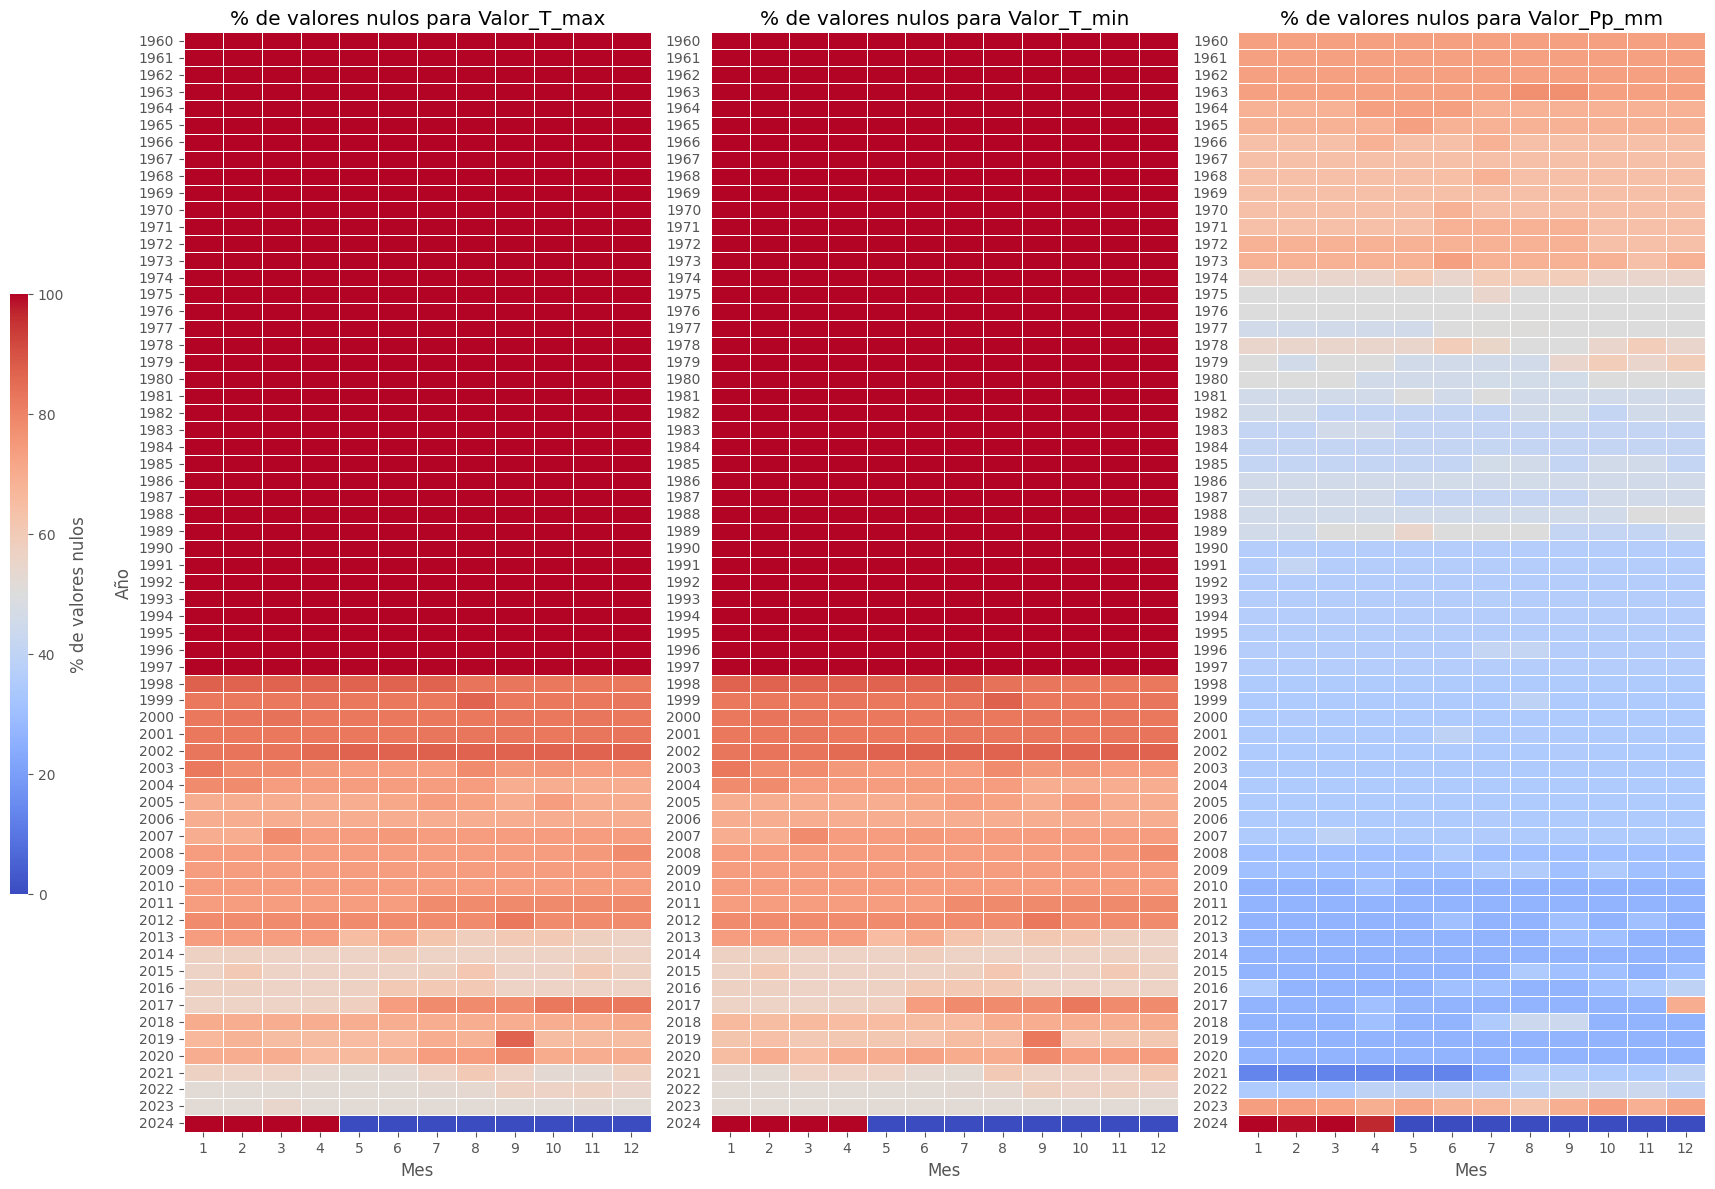

In [352]:
# Visualización de valores nulos
fig, axes = plt.subplots(1, 3, figsize=(18, 12), gridspec_kw={'width_ratios': [1, 1, 1]})
cbar_ax = fig.add_axes([0.05, 0.25, 0.01, 0.5]) 

sns.heatmap(pivot_valor_max,cmap="coolwarm",ax=axes[0],cbar_ax=cbar_ax,cbar_kws={'label': '% de valores nulos'},linewidths=0.5)
axes[0].set_title('% de valores nulos para Valor_T_max')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Año')

sns.heatmap(pivot_valor_min, cmap="coolwarm", ax=axes[1], cbar=False, linewidths=0.5)
axes[1].set_title('% de valores nulos para Valor_T_min')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('')  # Quitar el label del eje Y
axes[1].tick_params(left=False)  # Desactivar los ticks del eje Y

sns.heatmap(pivot_valor_Pp_mm, cmap="coolwarm", ax=axes[2], cbar=False, linewidths=0.5)
axes[2].set_title('% de valores nulos para Valor_Pp_mm')
axes[2].set_xlabel('Mes')
axes[2].set_ylabel('')  # Quitar el label del eje Y
axes[2].tick_params(left=False)  # Desactivar los ticks del eje Y


plt.tight_layout(rect=[0.1, 0, 1, 1]) 
plt.show()


Por resultados de valores nulos, inicialmente se descartan datos anterior a 1997. Igualmente, por mismo concepto de datos faltantes en 2024 se determina utilizar como año maximo 2023.

Bajo estas consideraciones, se toman los ultimos 10  años antes del año maximo (2013-2023)

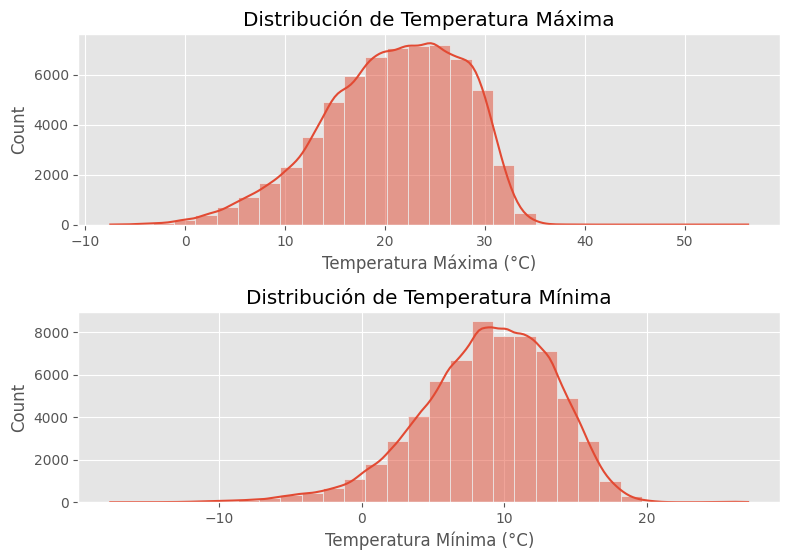

In [353]:
# Visualizar la distribución de las variables numéricas
plt.figure(figsize=(8, 8))

# Gráfico de distribución para Temperatura Máxima
plt.subplot(3, 1, 1)
sns.histplot(df_importa_data['Valor_T_max'], bins=30, kde=True)
plt.title('Distribución de Temperatura Máxima')
plt.xlabel('Temperatura Máxima (°C)')
plt.grid(True) 

# Gráfico de distribución para Temperatura Mínima
plt.subplot(3, 1, 2)
sns.histplot(df_importa_data['Valor_T_min'], bins=30, kde=True)
plt.title('Distribución de Temperatura Mínima')
plt.xlabel('Temperatura Mínima (°C)')
plt.grid(True) 

# Mostrar todos los gráficos
plt.tight_layout()
plt.show()

La temperatura más alta en la historia de Chile fue la de Los Ángeles con 42,2°C y el verano con mayor frecuencia de olas de calor fue el año 2023, por lo cual, se procederan a filtrar registros superior a "43"

In [354]:
# Filtro de datos y orden del DF
df_imputado_copia = df_importa_data.copy()
df_imputado_copia['Fecha'] = pd.to_datetime(df_imputado_copia['Fecha'])
df_imputado_copia = df_imputado_copia[(df_imputado_copia['Fecha'].dt.year > 2012) & (df_imputado_copia['Fecha'] < '2024-01-01')]
df_imputado_copia = df_imputado_copia[df_imputado_copia['Valor_T_max'] < 43]
df_imputado_copia.sort_values(by='Fecha', inplace=True)
print(df_imputado_copia.info())
print("Rango de fechas disponible:", df_imputado_copia['Fecha'].min(), "-", df_imputado_copia['Fecha'].max())


<class 'pandas.core.frame.DataFrame'>
Index: 35476 entries, 85257 to 378945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Estacion     35476 non-null  object        
 1   lat          35476 non-null  float64       
 2   long         35476 non-null  float64       
 3   Fecha        35476 non-null  datetime64[ns]
 4   Valor_T_max  35476 non-null  float64       
 5   Valor_T_min  35167 non-null  float64       
 6   Valor_Pp_mm  25903 non-null  float64       
 7   Coordenadas  35476 non-null  object        
 8   Año          35476 non-null  int32         
 9   Mes          35476 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(2), object(2)
memory usage: 2.7+ MB
None
Rango de fechas disponible: 2013-01-01 00:00:00 - 2023-12-31 00:00:00


Para evitar la reducción de registros en el periodo a estudio, la **estrategia de imputación datos** faltantes en variables númericas sera mediante utilización de algoritmo de machine learning **KNN**(vecino más cercano)

In [355]:
# Estadisticos iniciales
columnas_interes = df_imputado_copia.select_dtypes(include=['float64', 'int64']).columns.difference(['Coordenadas', 'lat', 'long'])   
df_imputado_copia[columnas_interes].describe().T.style.background_gradient(subset=['mean', 'std', '50%', 'count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
Valor_Pp_mm,25903.000000,0.454889,3.759186,0.000000,0.000000,0.000000,0.000000,180.000000
Valor_T_max,35476.000000,21.019275,6.754619,-6.663000,16.540000,21.600000,26.240000,41.700000
Valor_T_min,35167.000000,9.074780,4.717279,-17.600000,6.200000,9.420000,12.490000,27.070000


In [356]:
# Ingresar el KNN en funcion del temporalidad estacional, de lo contrario excluir

df_imputado_copia['Fecha'] = pd.to_datetime(df_imputado_copia['Fecha'])
df_imputado_copia['Año'] = df_imputado_copia['Fecha'].dt.year
df_imputado_copia['Mes'] = df_imputado_copia['Fecha'].dt.month
variables_a_imputar = ['Valor_T_max', 'Valor_T_min', 'Valor_Pp_mm']

# Inicializar el KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
df_imputacion = df_imputado_copia[variables_a_imputar + ['Año', 'Mes']].copy()
filas_para_imputar = []

# Imputar utilizando KNN, solo en los datos de los mismos meses y años
for año in df_imputacion['Año'].unique():
    for mes in df_imputacion['Mes'].unique():
        subset = df_imputacion[(df_imputacion['Año'] == año) & (df_imputacion['Mes'] == mes)]
        # Si hay suficientes datos para imputar
        if subset.shape[0] > 1:  # Necesitamos al menos 2 filas para tener vecinos
            # Imputar solo en el subconjunto
            subset_imputed = knn_imputer.fit_transform(subset[variables_a_imputar])
            df_imputacion.loc[subset.index, variables_a_imputar] = subset_imputed
            
            # Agregar los índices de las filas imputadas
            filas_para_imputar.extend(subset.index.tolist())

# Filtrar el DataFrame original para conservar solo las filas que se pueden imputar
df_imputado_copia = df_imputado_copia.loc[filas_para_imputar]

# Asignar los valores imputados de nuevo al DataFrame original
df_imputado_copia[variables_a_imputar] = df_imputacion[variables_a_imputar]

# Eliminar columnas auxiliares si ya no son necesarias
df_imputado_copia.drop(columns=['Año', 'Mes'], inplace=True)

# Verifica la información del DataFrame después de la imputación
print(df_imputado_copia.info())



<class 'pandas.core.frame.DataFrame'>
Index: 35476 entries, 85257 to 378945
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Estacion     35476 non-null  object        
 1   lat          35476 non-null  float64       
 2   long         35476 non-null  float64       
 3   Fecha        35476 non-null  datetime64[ns]
 4   Valor_T_max  35476 non-null  float64       
 5   Valor_T_min  35476 non-null  float64       
 6   Valor_Pp_mm  35476 non-null  float64       
 7   Coordenadas  35476 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 2.4+ MB
None


In [357]:
# Estadisticos post tratamiento de datos faltantes

columnas_interes = df_imputado_copia.select_dtypes(include=['float64', 'int64']).columns.difference(['Coordenadas', 'lat', 'long'])   
df_imputado_copia[columnas_interes].describe().T.style.background_gradient(subset=['mean', 'std', '50%', 'count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
Valor_Pp_mm,35476.000000,0.470585,3.494656,0.000000,0.000000,0.000000,0.000000,180.000000
Valor_T_max,35476.000000,21.019275,6.754619,-6.663000,16.540000,21.600000,26.240000,41.700000
Valor_T_min,35476.000000,9.021922,4.742789,-17.600000,6.125750,9.400000,12.450000,27.070000


**1.3 Generación de nuevas variables**

Para agregar valor a las posibles conclusiones se agrega una nueva variable que mide la diferencia entre los maximos y minimos de las temperaturas de cada día

In [358]:
# Nuevas variables
df_imputado_copia['Diferencia_T'] = df_imputado_copia['Valor_T_max'] - df_imputado_copia['Valor_T_min']
df_imputado_copia['Media_T'] = (df_imputado_copia['Valor_T_max'] + df_imputado_copia['Valor_T_min'])/2
df_imputado_copia['Fecha_num'] = mdates.date2num(df_imputado_copia['Fecha'])
df_imputado_copia.columns 

Index(['Estacion', 'lat', 'long', 'Fecha', 'Valor_T_max', 'Valor_T_min',
       'Valor_Pp_mm', 'Coordenadas', 'Diferencia_T', 'Media_T', 'Fecha_num'],
      dtype='object')

In [359]:
# DF temperaturas por fecha: por 'Date', 'Valor_T_max' , 'Valor_T_min' y 'Media_T'

df_dates_temperatures = df_imputado_copia.groupby('Fecha').agg({
    'Valor_T_max': 'mean',
    'Valor_T_min': 'mean',
    'Media_T': 'mean'
}).reset_index()
df_dates_temperatures['año'] = df_dates_temperatures['Fecha'].dt.year
df_dates_temperatures['mes'] = df_dates_temperatures['Fecha'].dt.month
df_dates_temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        4017 non-null   datetime64[ns]
 1   Valor_T_max  4017 non-null   float64       
 2   Valor_T_min  4017 non-null   float64       
 3   Media_T      4017 non-null   float64       
 4   año          4017 non-null   int32         
 5   mes          4017 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(2)
memory usage: 157.0 KB


In [360]:
# DF Media mensual: por 'año', 'mes' , 'Valor_T_max' , 'Valor_T_min' y 'Media_T'

df_imputado_copia['año'] = df_imputado_copia['Fecha'].dt.year
df_imputado_copia['mes'] = df_imputado_copia['Fecha'].dt.month
df_media_mensual = df_imputado_copia.groupby(['año', 'mes']).agg({
    'Valor_T_max': 'mean',
    'Valor_T_min': 'mean',
    'Media_T': 'mean'
}).reset_index()
df_media_mensual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   año          132 non-null    int32  
 1   mes          132 non-null    int32  
 2   Valor_T_max  132 non-null    float64
 3   Valor_T_min  132 non-null    float64
 4   Media_T      132 non-null    float64
dtypes: float64(3), int32(2)
memory usage: 4.3 KB


In [361]:
# df_filtered_4_years: Filtra df_media_mensual solo los últimos 4 años

last_4_years = df_media_mensual['año'].unique()[-4:]
df_filtered_4_years = df_media_mensual[df_media_mensual['año'].isin(last_4_years)]

In [362]:
last_4_years = df_imputado_copia['Fecha'].dt.year.unique()[-4:]
df_filtered = df_imputado_copia[df_imputado_copia['Fecha'].dt.year.isin(last_4_years)]
df_filtered.loc[:, 'año'] = df_filtered['Fecha'].dt.year
df_filtered.loc[:, 'mes'] = df_filtered['Fecha'].dt.month
df_estaciones_agrupadas = df_filtered.groupby(['Estacion', 'año', 'mes']).agg({
    'Valor_T_max': 'max',
    'Valor_Pp_mm': 'sum',
    'lat': 'mean',
    'long': 'mean',
    'Coordenadas': 'first' 
}).reset_index()
print(df_estaciones_agrupadas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Estacion     468 non-null    object 
 1   año          468 non-null    int32  
 2   mes          468 non-null    int32  
 3   Valor_T_max  468 non-null    float64
 4   Valor_Pp_mm  468 non-null    float64
 5   lat          468 non-null    float64
 6   long         468 non-null    float64
 7   Coordenadas  468 non-null    object 
dtypes: float64(4), int32(2), object(2)
memory usage: 25.7+ KB
None


### **2. Storytelling Metereológico**

Desde un punto de partida, buscamos saber cual ha sido el compartimiento historico de cada variable objetivo

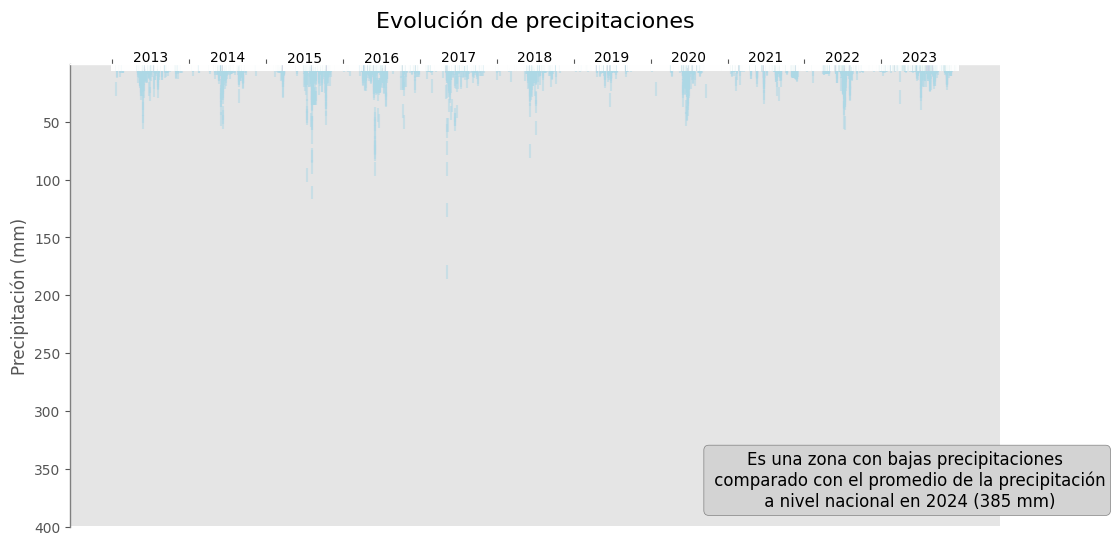

In [363]:
# Evolución de precipitaciones
fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')
colores = ['lightblue' if valor > 0 else 'white' for valor in df_imputado_copia['Valor_Pp_mm']]

# Grafico
ax.scatter(df_imputado_copia['Fecha'], df_imputado_copia['Valor_Pp_mm'], 
           color=colores, alpha=0.5, s=100, marker='|')

# Títulos y etiquetas
ax.set_title('Evolución de precipitaciones', fontsize=16)
ax.set_xlabel(' ', fontsize=12)
ax.set_ylabel('Precipitación (mm)', fontsize=12)

# Ejes X e Y
plt.gca().invert_yaxis()
ax.set_ylim(400, 0.436488)  # Invertir el rango
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
years = pd.DatetimeIndex(df_imputado_copia['Fecha']).year.unique()
ax.set_xticks(pd.to_datetime(years, format='%Y'))
ax.set_xticklabels([])
for year in years:
    mask = pd.DatetimeIndex(df_imputado_copia['Fecha']).year == year
    mean_value = df_imputado_copia[mask]['Valor_Pp_mm'].mean()
    ax.text(pd.Timestamp(f'{year}-07-01'), mean_value, f'{year}', 
            ha='center', va='bottom', fontsize=10, color='black')

# Spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('grey') 
ax.spines['bottom'].set_visible(False)

# Anotaciones
ax.annotate('Es una zona con bajas precipitaciones \n comparado con el promedio de la precipitación\n a nivel nacional en 2024 (385 mm)', xy=(0.9, 0.1), xycoords='axes fraction',
            ha='center', va='center', fontsize=12, color='black',
            bbox=dict(boxstyle='round', facecolor='lightgrey', edgecolor='grey'))
plt.grid(False) 
plt.show()


## Evolución de Precipitaciones

La visualización muestra la evolución de las precipitaciones en la región analizada desde el año 2013 hasta el 2023. Los valores de precipitación (en milímetros) se mantienen consistentemente bajos a lo largo del período. La mayoría de los valores registrados están muy por debajo del promedio nacional de precipitación anual, que es de 385 mm en el año 2024. Esto sugiere que la zona es árida o semiárida, caracterizada por bajas precipitaciones anuales.

### Observaciones destacadas:

- **Variabilidad anual:** La precipitación muestra una tendencia de variabilidad anual sin grandes picos, lo que implica que no se observan años particularmente húmedos en comparación con el promedio.
- **Condición de sequía:** Esta región puede considerarse como una zona de bajas precipitaciones, lo cual es consistente con el clima árido de varias zonas de Chile.
- **Comparación nacional:** La anotación en el gráfico resalta la diferencia entre el promedio de precipitación de la región y el promedio nacional, enfatizando que las precipitaciones locales son considerablemente inferiores al promedio de 385 mm en el año 2024.

Este análisis es crucial para la planificación de recursos hídricos y el diseño de estrategias de mitigación en áreas con disponibilidad de agua limitada.


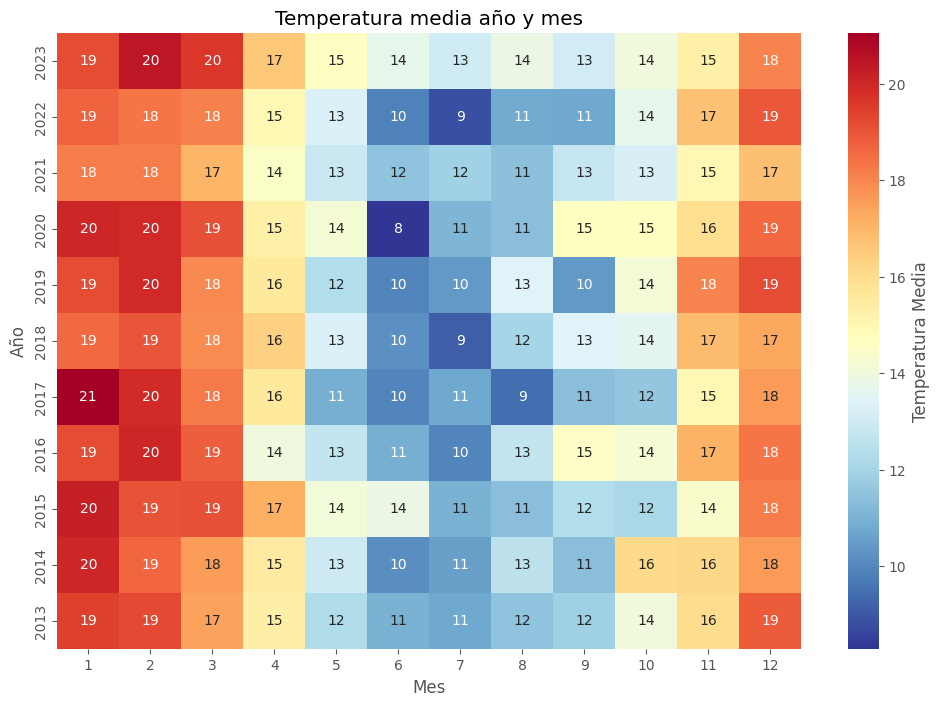

In [364]:
# Evolución medias de temperatura
plt.figure(figsize=(12, 8))
heatmap_data = df_media_mensual.pivot(index='año', columns='mes', values='Media_T').sort_index(ascending=False)
# Grafico
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='RdYlBu_r', cbar_kws={'label': 'Temperatura Media'})
# Título
plt.title("Temperatura media año y mes")
# Ejes X e Y
plt.xlabel("Mes")
plt.ylabel("Año")
plt.show()


## La Temperatura Media por Año y Mes

La visualización muestra un mapa de calor de la temperatura media mensual en una región específica desde el año 2013 hasta el 2023. Cada celda representa la temperatura promedio en grados Celsius de un mes en un año determinado, y los colores indican la magnitud de la temperatura, donde los tonos rojos representan temperaturas más altas y los tonos azules representan temperaturas más bajas.

### Observaciones principales:

- **Patrón estacional**: Se observa un claro patrón estacional, con los meses de verano (diciembre, enero y febrero) mostrando las temperaturas más altas (rojo), y los meses de invierno (junio, julio y agosto) mostrando las temperaturas más bajas (azul).
- **Variación interanual**: Aunque hay una consistencia general en los patrones estacionales, se observan algunas variaciones de temperatura entre los años. Por ejemplo, en 2017 y 2020, julio registra temperaturas inusualmente bajas.
- **Tendencia de aumento en meses cálidos**: Hacia el final de la serie, los meses de verano (enero y febrero) muestran una tendencia a temperaturas ligeramente más altas, lo cual podría indicar un aumento en las temperaturas máximas de la temporada cálida.
- **Meses de transición**: En los meses de transición (primavera y otoño), se aprecia una variabilidad mayor en las temperaturas entre años, reflejada en la variedad de colores.

Este análisis permite identificar patrones de temperatura a lo largo de los años y puede ser útil para estudios climáticos, estrategias agrícolas o planificación de recursos naturales en la región.


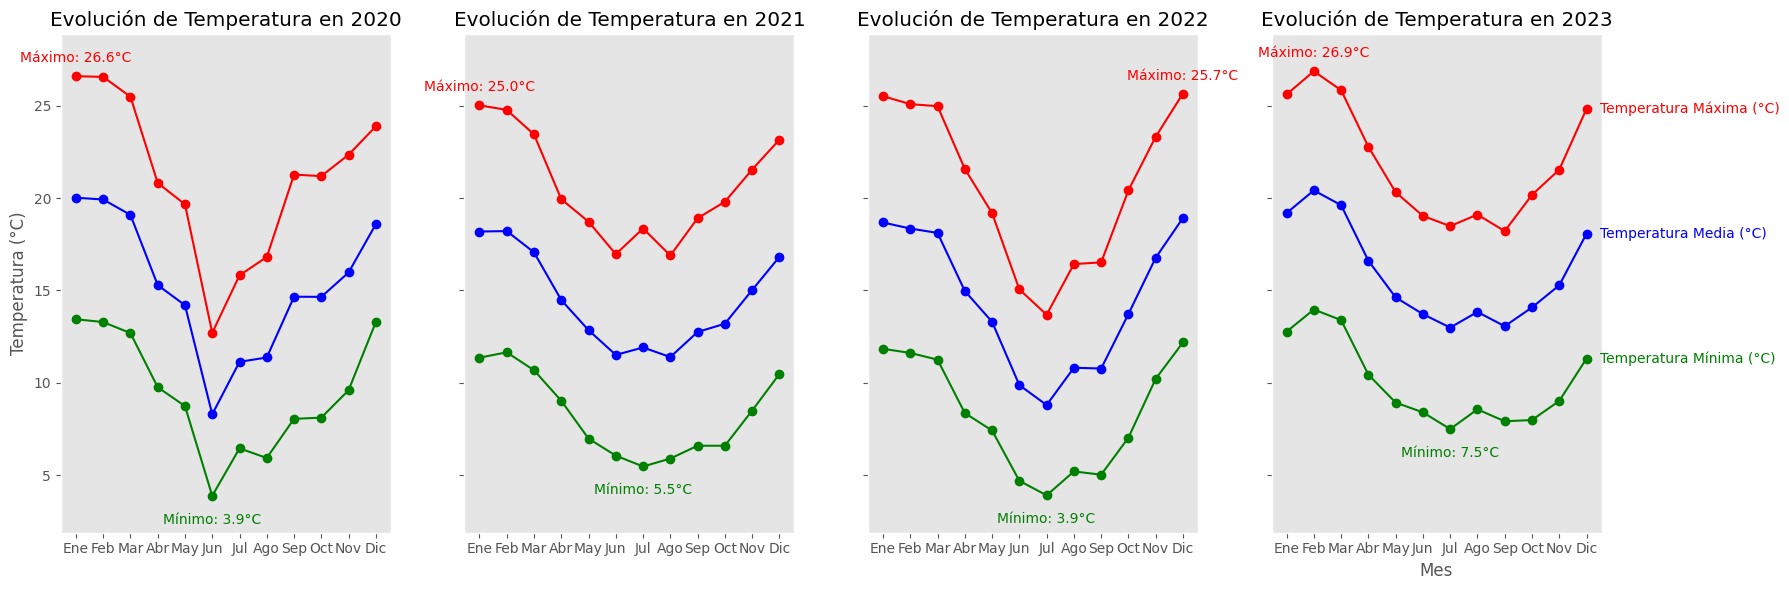

In [365]:
# Evolución temperatura ultimos 4 años

# Crear la figura y los ejes
fig, axs = plt.subplots(1, 4, figsize=(18, 6), sharex=True)

# Establecer los meses como etiquetas
months = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Inicializar límites de temperatura
y_min = float('inf')
y_max = float('-inf')

# Calcular los límites máximos y mínimos
for year in last_4_years:
    year_data = df_filtered_4_years[df_filtered_4_years['año'] == year]
    y_min = min(y_min, year_data['Valor_T_min'].min(), year_data['Media_T'].min(), year_data['Valor_T_max'].min())
    y_max = max(y_max, year_data['Valor_T_min'].max(), year_data['Media_T'].max(), year_data['Valor_T_max'].max())

# Graficar cada año en un subgráfico
for i, year in enumerate(last_4_years):
    year_data = df_filtered_4_years[df_filtered_4_years['año'] == year]
    
    # Graficar las tres líneas
    axs[i].plot(year_data['mes'], year_data['Valor_T_max'], marker='o', linestyle='-', color='red')
    axs[i].plot(year_data['mes'], year_data['Media_T'], marker='o', linestyle='-', color='blue')
    axs[i].plot(year_data['mes'], year_data['Valor_T_min'], marker='o', linestyle='-', color='green')
    
    # Añadir título para el primer subgráfico
    if i == 0:
        axs[i].set_title(f'Evolución de Temperatura en {year}')
        axs[i].set_ylabel('Temperatura (°C)')  # Solo título para el primer gráfico
    else:
        axs[i].set_title(f'Evolución de Temperatura en {year}')
        axs[i].set_yticklabels([])  # Eliminar ticks del eje y en los demás subgráficos
        axs[i].set_ylabel('')  # Eliminar título del eje y en los demás subgráficos

    axs[i].grid(False)
    
    # Establecer los límites del eje y
    axs[i].set_ylim(y_min - 2, y_max + 2)  # Ajusta el margen según sea necesario

    # Establecer ticks para el eje x
    axs[i].set_xticks(range(1, 13))  # Meses de 1 a 12
    axs[i].set_xticklabels(months)  # Etiquetas de los meses

   # Anotar los valores mínimos y máximos
    min_temp = year_data['Valor_T_min'].min()
    max_temp = year_data['Valor_T_max'].max()
    axs[i].annotate(f'Mínimo: {min_temp:.1f}°C', xy=(year_data['mes'][year_data['Valor_T_min'] == min_temp].values[0], min_temp),
                    xytext=(0, -20), textcoords='offset points', color='green', fontsize=10, ha='center')
    axs[i].annotate(f'Máximo: {max_temp:.1f}°C', xy=(year_data['mes'][year_data['Valor_T_max'] == max_temp].values[0], max_temp),
                    xytext=(0, 10), textcoords='offset points', color='red', fontsize=10, ha='center')

    # Añadir leyenda solo en el último subgráfico
    if i == 3:
        axs[i].text(12.5, year_data['Valor_T_max'].iloc[-1], 'Temperatura Máxima (°C)', color='red', fontsize=10, va='center')
        axs[i].text(12.5, year_data['Media_T'].iloc[-1], 'Temperatura Media (°C)', color='blue', fontsize=10, va='center')
        axs[i].text(12.5, year_data['Valor_T_min'].iloc[-1], 'Temperatura Mínima (°C)', color='green', fontsize=10, va='center')

# Ajustar el diseño
plt.xlabel('Mes')
plt.tight_layout()
plt.show()

## Interpretación de la Evolución de Temperaturas (2020-2023)

La visualización muestra la evolución de las temperaturas máxima, media y mínima mensual entre los años 2020 y 2023. Cada gráfico individual representa un año, y las temperaturas están diferenciadas por color: rojo para la máxima, azul para la media, y verde para la mínima.

### Observaciones Principales:
- **Patrón estacional**: En los cuatro años, se observa un patrón estacional claro, con las temperaturas más altas registradas durante los meses de verano (enero a marzo) y las más bajas durante los meses de invierno (junio a agosto).
- **Variación de máximos y mínimos**:
  - En el año 2020, la temperatura máxima alcanzó los 26.6°C y la mínima bajó hasta los 3.9°C.
  - En 2021, el máximo fue de 25.0°C y el mínimo de 5.5°C, mostrando temperaturas menos extremas en comparación con 2020.
  - En 2022, el máximo fue de 25.7°C y el mínimo nuevamente de 3.9°C.
  - En 2023, se alcanzó el valor máximo más alto de estos cuatro años, con 26.9°C, y un mínimo de 7.5°C, reflejando posiblemente un ligero aumento en las temperaturas.
- **Comparación entre años**: 
  - A lo largo de los cuatro años, las temperaturas parecen seguir una tendencia general, con variaciones anuales leves. Los valores de temperatura mínima de 2020 y 2022 (3.9°C) son los más bajos registrados, mientras que 2023 destaca por tener tanto el valor máximo de 26.9°C como el mínimo más alto (7.5°C), lo que sugiere una menor amplitud térmica.
  - Las temperaturas medias también siguen este patrón de oscilación estacional, siendo más cálidas en verano y frescas en invierno.

### Conclusión
La visualización destaca la consistencia de las temperaturas estacionales en esta región, así como variaciones anuales que podrían indicar patrones climáticos específicos o cambios a largo plazo. Esta información es valiosa para el análisis climático y la planificación en función de los recursos naturales y las actividades económicas.


Por lo cual buscamos ver como varian estos parametros ambientales en las dintitas estaciones

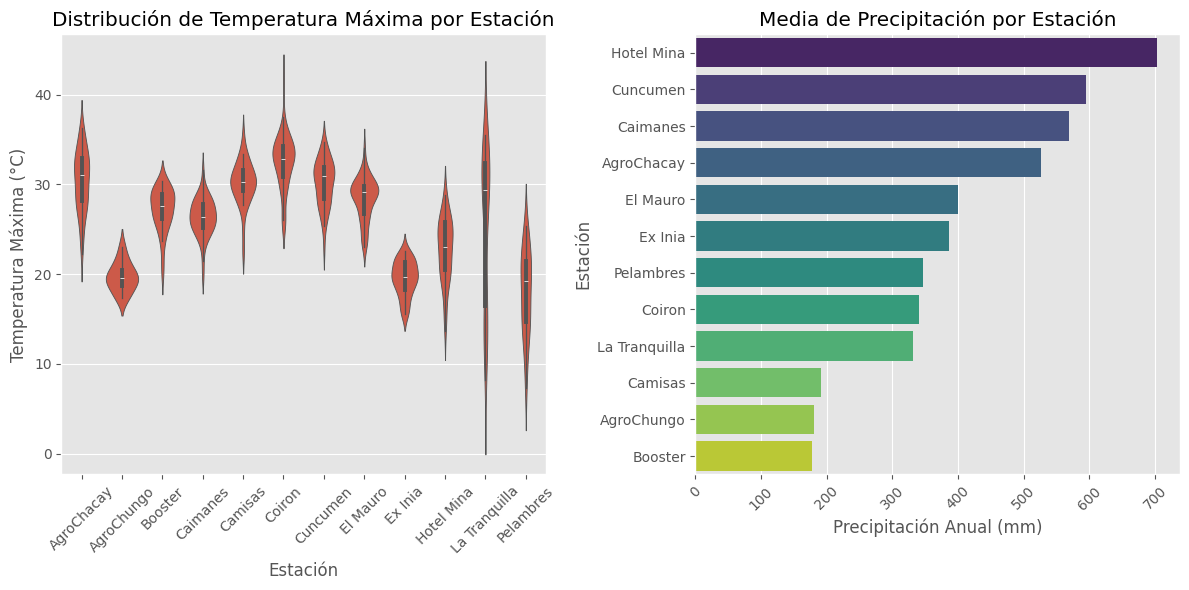

In [366]:
plt.figure(figsize=(12, 6))

# Temperaturas maximas
plt.subplot(1, 2, 1)  # (filas, columnas, índice)
sns.violinplot(x='Estacion', y='Valor_T_max', data=df_estaciones_agrupadas)
plt.title('Distribución de Temperatura Máxima por Estación')
plt.xlabel('Estación')
plt.ylabel('Temperatura Máxima (°C)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario

# Segundo subplot para Precipitación 
plt.subplot(1, 2, 2)

# Calcular la media de 'Valor_Pp_mm' para cada estación
bar_data = df_estaciones_agrupadas.groupby('Estacion').agg({
    'Valor_Pp_mm': 'sum'
}).reset_index()

# Ordenar los datos de forma descendente
bar_data = bar_data.sort_values(by='Valor_Pp_mm', ascending=False)

# Crear el gráfico de barras
sns.barplot(x='Valor_Pp_mm', y='Estacion', data=bar_data, hue='Estacion', palette='viridis', legend=False)
plt.title('Media de Precipitación por Estación')
plt.xlabel('Precipitación Anual (mm)')
plt.ylabel('Estación')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario

# Ajustar el diseño
plt.tight_layout()
plt.show()


## Distribución de Temperatura Máxima y Precipitación Anual por Estación

### Distribución de Temperatura Máxima por Estación
El gráfico de violín a la izquierda representa la distribución de las temperaturas máximas para cada estación en la región. Algunas observaciones clave incluyen:

- **Variabilidad de temperaturas**: Las estaciones muestran variaciones en sus rangos de temperatura máxima, con algunas como "Hotel Mina" y "La Tranquilla" alcanzando valores superiores a los 40°C en sus registros de máximas.
- **Distribuciones distintivas**: Algunas estaciones presentan una distribución más concentrada y simétrica de sus temperaturas máximas (como "Booster" y "Camisas"), mientras que otras tienen distribuciones más amplias o asimétricas, lo que sugiere mayor variabilidad en las temperaturas registradas.
- **Tendencia general**: La mayoría de las estaciones tienen una temperatura máxima media entre 25°C y 35°C, con algunas excepciones que se destacan por temperaturas más altas.

### Media de Precipitación Anual por Estación
El gráfico de barras a la derecha muestra la media de precipitación anual en milímetros para cada estación:

- **Estaciones con mayor precipitación**: "Hotel Mina" y "Cuncumen" son las estaciones con mayores niveles de precipitación anual, registrando valores cercanos a los 700 mm.
- **Estaciones con menor precipitación**: En contraste, estaciones como "Booster" y "AgroChungo" muestran los niveles más bajos de precipitación, con valores por debajo de los 200 mm, indicando zonas más secas.
- **Gradiente de precipitaciones**: Existe un claro gradiente de precipitación, con algunas estaciones mostrando más de 500 mm anuales, mientras que otras no superan los 300 mm. Esto podría deberse a variaciones locales en las condiciones climáticas y topográficas que influyen en la distribución de la precipitación.

La visualización conjunta de temperatura máxima y precipitación anual permite identificar estaciones con condiciones climáticas particulares, como "Hotel Mina", que combina alta precipitación y alta temperatura máxima. Estos datos son esenciales para comprender las diferencias microclimáticas en la región, las cuales pueden influir en la vegetación, la agricultura y la disponibilidad de recursos hídricos.


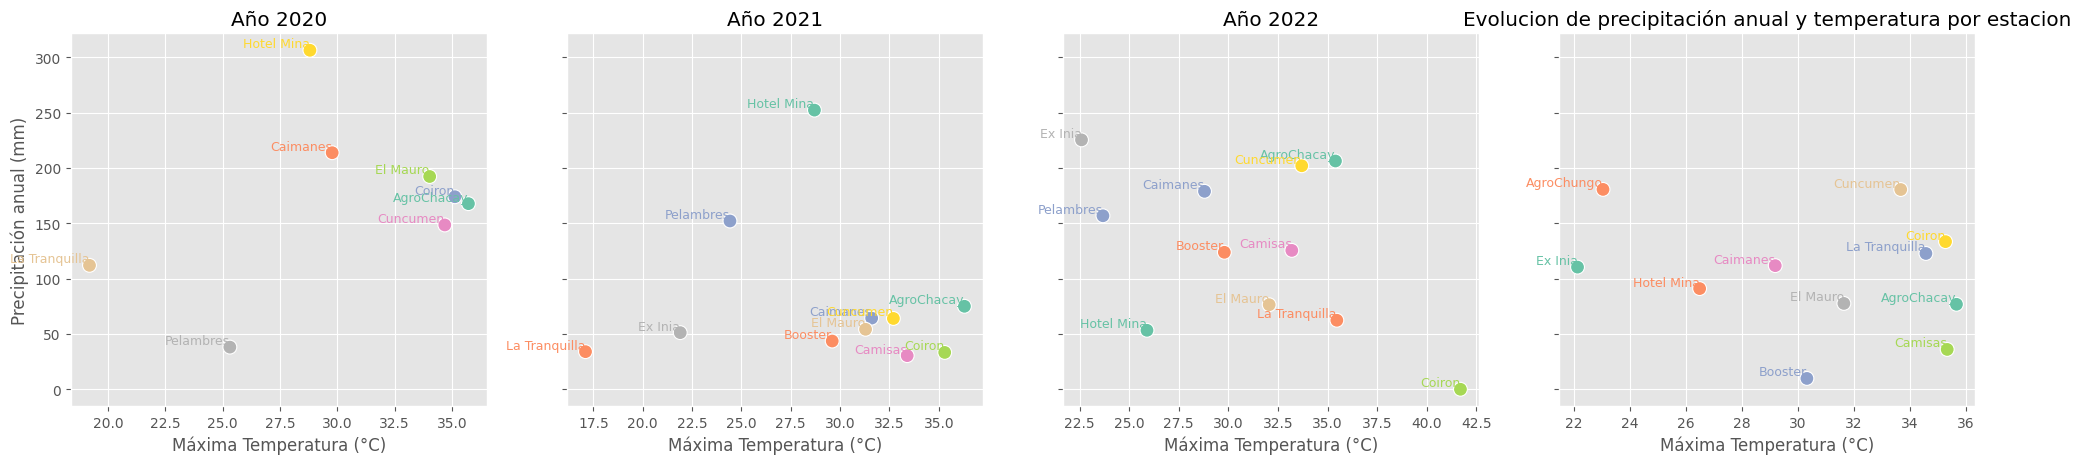

In [367]:
# Agrupar por año y estación para obtener la suma de precipitación y el máximo de temperatura

df_anual = df_estaciones_agrupadas.groupby(['año', 'Estacion']).agg({
    'Valor_Pp_mm': 'sum',   # Suma de precipitación
    'Valor_T_max': 'max'    # Máximo de temperatura
}).reset_index()

# Crear la figura y los subgráficos en una disposición de 1x4 (un año en cada subgráfico)
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Obtener los años únicos para iterar en los subgráficos
años = sorted(df_anual['año'].unique())

# Graficar cada año en un subgráfico
for i, año in enumerate(años):
    # Filtrar datos del año
    data = df_anual[df_anual['año'] == año]
    
    # Gráfico de dispersión para el año actual con colores distintos por estación
    sns.scatterplot(x='Valor_T_max', y='Valor_Pp_mm', hue='Estacion', data=data, ax=axes[i], s=100, palette="Set2")
    axes[i].set_title(f"Año {año}")
    axes[i].set_xlabel('Máxima Temperatura (°C)')
    if i == 0:
        axes[i].set_ylabel('Precipitación anual (mm)')

    # Eliminar la leyenda
    if axes[i].get_legend() is not None:
        axes[i].get_legend().remove()
    
    # Añadir los nombres de las estaciones directamente en los puntos
    for j in range(len(data)):
        axes[i].text(data['Valor_T_max'].iloc[j], data['Valor_Pp_mm'].iloc[j], 
                     data['Estacion'].iloc[j], ha='right', va='bottom', fontsize=9, color=axes[i].get_lines()[j].get_color())

# Ajustar el diseño y eliminar leyenda duplicada
plt.title("Evolucion de precipitación anual y temperatura por estacion")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Evolución de la Temperatura Máxima y Precipitación Anual por Estación (2020 - 2023)

La visualización muestra la relación entre la temperatura máxima anual y la precipitación acumulada para distintas estaciones en la región, dividida en cuatro subgráficos que representan los años 2020, 2021, 2022 y 2023. Cada punto representa una estación, etiquetada con su nombre y color único para facilitar la comparación entre los años.

### Observaciones Principales

1. **Distribución de Temperaturas y Precipitaciones**:
   - Las estaciones presentan una amplia gama de temperaturas máximas y niveles de precipitación.
   - La estación "Hotel Mina" destaca en varios años, registrando altos niveles de precipitación en comparación con otras estaciones.
   - "Cuncumen" y "El Mauro" mantienen valores relativamente altos de temperatura máxima, aunque su precipitación varía entre años.

2. **Variabilidad Interanual**:
   - La temperatura máxima y la precipitación anual de algunas estaciones varían considerablemente entre años. Por ejemplo, en 2020, "Hotel Mina" muestra una alta precipitación anual y temperatura máxima, mientras que en 2021 su precipitación se reduce, aunque sigue siendo elevada en comparación con otras estaciones.
   - En 2022, se observa un incremento en la temperatura máxima de estaciones como "AgroChacay" y "Cuncumen", mientras que "Coiron" presenta un valor de temperatura máximo muy alto con una baja precipitación.
   - Para 2023, la distribución de estaciones sugiere una tendencia general a temperaturas más elevadas y precipitaciones más dispersas entre las estaciones.

3. **Patrones Notables**:
   - Las estaciones en zonas de baja precipitación, como "La Tranquilla" y "Booster", consistentemente muestran temperaturas altas o moderadas y bajo nivel de precipitaciones en comparación con otras estaciones.
   - "AgroChacay" y "Camisas" tienden a mantener un equilibrio entre la temperatura máxima y la precipitación, mostrando valores intermedios en la mayoría de los años.

4. **Relación entre Precipitación y Temperatura**:
   - No parece haber una relación directa entre los valores de precipitación y temperatura máxima; algunas estaciones mantienen temperaturas elevadas con poca precipitación, como "La Tranquilla", mientras que otras, como "Hotel Mina", alcanzan altos valores en ambas variables.


La variabilidad en la temperatura máxima y la precipitación anual entre estaciones y años resalta la influencia de factores microclimáticos en la región. Estas diferencias pueden impactar en el tipo de vegetación y el uso de suelo alrededor de cada estación. Estaciones con alta temperatura y baja precipitación probablemente enfrenten condiciones de aridez más extremas, mientras que aquellas con mayores niveles de precipitación pueden ofrecer un entorno más favorable para actividades agrícolas o forestales.


In [368]:
# --- Cargar el shapefile de las regiones ---

shapefile_path = r'C:\Entorno_Desarrollo_UDD\Visualizacion_de_la_Informacion\data\Comunas\comunas.shp'  # Incluye el nombre del archivo .shp

try:
    shape_comunas_gdf = gpd.read_file(shapefile_path)
except Exception as e:
    print(f"Error al cargar el shapefile: {e}")


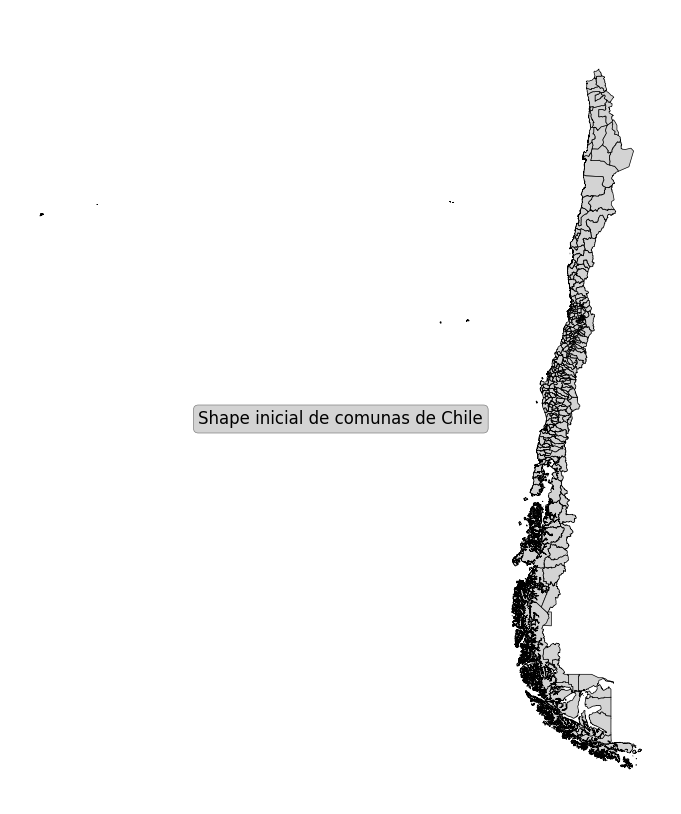

In [369]:

plt.style.use('ggplot')


fig, ax = plt.subplots(figsize=(10, 10)) 
shape_comunas_gdf.plot(ax=ax, color='lightgray', edgecolor='black')  
plt.title(' ', fontsize=15)
ax.annotate('Shape inicial de comunas de Chile', xy=(0.5, 0.5), xycoords='axes fraction',
            ha='center', va='center', fontsize=12, color='black',
            bbox=dict(boxstyle='round', facecolor='lightgrey', edgecolor='grey'))
ax.axis('off')
plt.gcf().patch.set_facecolor('white')
plt.show()



In [370]:
shape_comunas_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    346 non-null    int64   
 1   shape_leng  346 non-null    float64 
 2   dis_elec    346 non-null    int32   
 3   cir_sena    346 non-null    int32   
 4   cod_comuna  346 non-null    int32   
 5   codregion   346 non-null    int32   
 6   st_area_sh  346 non-null    float64 
 7   st_length_  346 non-null    float64 
 8   Region      346 non-null    object  
 9   Comuna      346 non-null    object  
 10  Provincia   346 non-null    object  
 11  geometry    346 non-null    geometry
dtypes: float64(3), geometry(1), int32(4), int64(1), object(3)
memory usage: 27.2+ KB


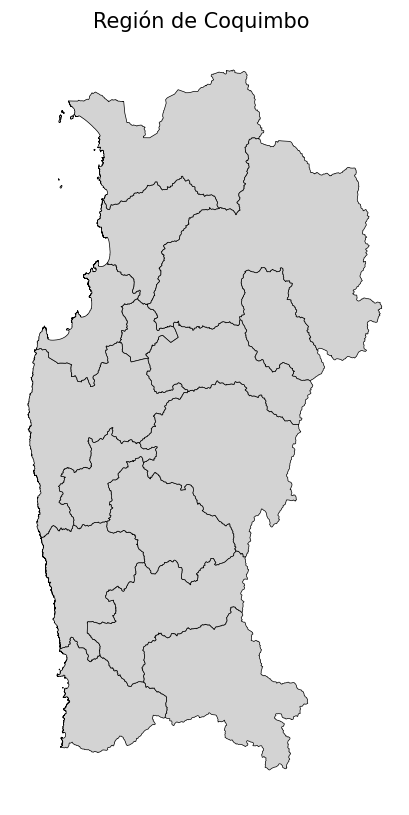

In [371]:
# Filtrar el GeoDataFrame para la Región de Coquimbo 

plt.style.use('ggplot')

gdf_coquimbo = shape_comunas_gdf[(shape_comunas_gdf['codregion'] == 4)]
fig, ax = plt.subplots(figsize=(10, 10)) 
gdf_coquimbo.plot(ax=ax, color='lightgray', edgecolor='black')  
plt.title('Región de Coquimbo ', fontsize=15)
ax.axis('off')
plt.gcf().patch.set_facecolor('white')
plt.show()



In [372]:
# Filtrar el GeoDataFrame para la Región de Coquimbo y la Provincia de Choapa
gdf_coquimbo_choapa = shape_comunas_gdf[(shape_comunas_gdf['codregion'] == 4) & (shape_comunas_gdf['Provincia'] == 'Choapa')]

# Mostrar las primeras filas del GeoDataFrame filtrado
gdf_coquimbo_choapa.head()

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
211,64,281879.768370,5,5,4203,4,2.586951e+09,372268.897625,Región de Coquimbo,Los Vilos,Choapa,"MULTIPOLYGON (((-7964264.651 -3727784.991, -79..."
212,62,314433.003983,5,5,4202,4,3.023257e+09,414867.293177,Región de Coquimbo,Canela,Choapa,"POLYGON ((-7975718.051 -3661191.176, -7975718...."
245,63,360387.693145,5,5,4201,4,3.629837e+09,423986.085282,Región de Coquimbo,Illapel,Choapa,"POLYGON ((-7857583.146 -3669235.934, -7857509...."
301,65,372597.428712,5,5,4204,4,4.795458e+09,440576.778684,Región de Coquimbo,Salamanca,Choapa,"POLYGON ((-7826929.647 -3794667.682, -7826929...."


<Axes: >

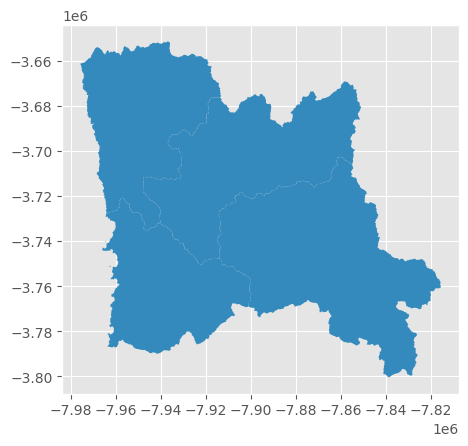

In [373]:
gdf_coquimbo_choapa.plot()

In [374]:
gdf_coquimbo_choapa.loc[:, 'st_area_sh'] = (gdf_coquimbo_choapa['st_area_sh'] / 1e6).round(2)
gdf_coquimbo_choapa.to_file('gdf_coquimbo_choapa.shp', driver='ESRI Shapefile')

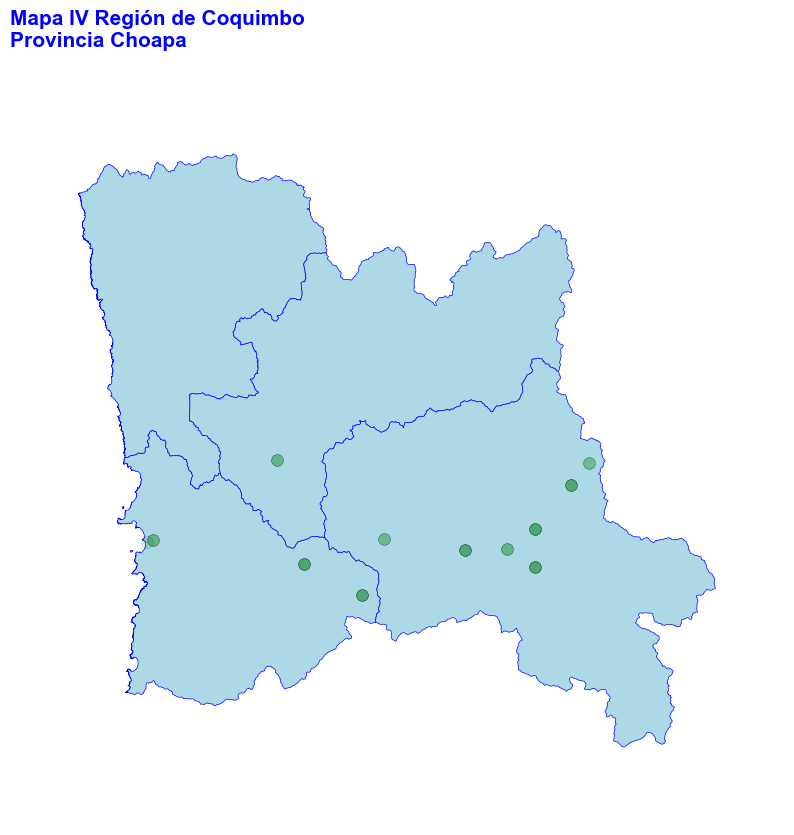

In [375]:
# Puntos de toma de datos

plt.style.use('ggplot')

df_estaciones_agrupadas['Coordenadas'] = df_estaciones_agrupadas.apply(lambda row: Point(row['long'], row['lat']), axis=1)
gdf_estaciones = gpd.GeoDataFrame(df_estaciones_agrupadas, geometry='Coordenadas')

# Asegurar que el CRS coincida
gdf_estaciones.set_crs(epsg=4326, inplace=True)  # Asignar CRS si no está asignado
gdf_estaciones = gdf_estaciones.to_crs(gdf_coquimbo.crs)  # Convertir CRS

# Filtrar el GeoDataFrame para la Región de Coquimbo y la Provincia de Choapa
gdf_coquimbo_choapa = shape_comunas_gdf[(shape_comunas_gdf['codregion'] == 4) & (shape_comunas_gdf['Provincia'] == 'Choapa')]

# Definir los límites del zoom
xmin = -7.993e6
xmax = -7.798e6
ymin = -3.82e6
ymax = -3.63e6

# Graficar el shapefile de la región de Coquimbo
fig, ax = plt.subplots(figsize=(10, 10))
gdf_coquimbo_choapa.plot(ax=ax, color='lightblue', edgecolor='blue')

# Graficar las estaciones en el mismo mapa
gdf_estaciones.plot(ax=ax, marker='o', color='green', markersize=72, alpha=0.01)

# Agregar título al gráfico
ax.set_title('Mapa IV Región de Coquimbo\nProvincia Choapa', fontsize=15, fontweight='bold', color='blue', fontname='Arial', loc='left')

# Apagar los ejes del mapa
ax.axis('off')

# Ajustar los límites del mapa para el zoom
ax.set_xlim(xmin, xmax) 
ax.set_ylim(ymin, ymax) 

plt.show()

In [380]:
df_estaciones_agrupadas.head()

,Estacion,año,mes,Valor_T_max,Valor_Pp_mm,lat,long,Coordenadas,Tamaño_P,Tamaño_T,Temp_Category,Pp_Category,Bivariate_Index
0,AgroChacay,2020,1,35.72,0.0,-31.863935,-70.616477,POINT (-70.61647709322419 -31.86393477004859),0.0,535.80,1.0,0.0,1.0
1,AgroChacay,2020,2,34.07,0.0,-31.863935,-70.616477,POINT (-70.61647709322419 -31.86393477004859),0.0,511.05,1.0,0.0,1.0
2,AgroChacay,2020,3,34.37,0.0,-31.863935,-70.616477,POINT (-70.61647709322419 -31.86393477004859),0.0,515.55,1.0,0.0,1.0
3,AgroChacay,2020,4,32.52,0.0,-31.863935,-70.616477,POINT (-70.61647709322419 -31.86393477004859),0.0,487.80,1.0,0.0,1.0
4,AgroChacay,2020,5,32.80,0.0,-31.863935,-70.616477,POINT (-70.61647709322419 -31.86393477004859),0.0,492.00,1.0,0.0,1.0


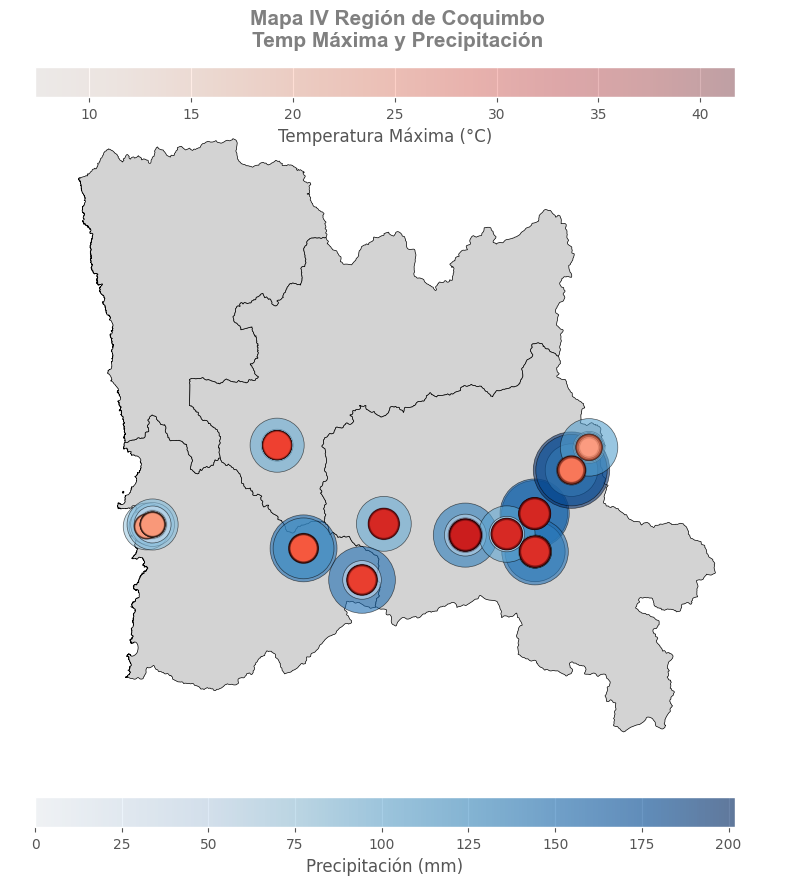

In [377]:
plt.style.use('ggplot')

# Convertir df_estaciones_agrupadas a un GeoDataFrame
df_estaciones_agrupadas['Coordenadas'] = df_estaciones_agrupadas.apply(lambda row: Point(row['long'], row['lat']), axis=1)
gdf_estaciones = gpd.GeoDataFrame(df_estaciones_agrupadas, geometry='Coordenadas')

# Asegurar que el CRS coincida
gdf_estaciones.set_crs(epsg=4326, inplace=True)  # Asignar CRS si no está asignado
gdf_estaciones = gdf_estaciones.to_crs(gdf_coquimbo_choapa.crs)  # Convertir CRS

# Filtrar el GeoDataFrame para la Región de Coquimbo y la Provincia de Choapa
gdf_coquimbo_choapa = shape_comunas_gdf[(shape_comunas_gdf['codregion'] == 4) & (shape_comunas_gdf['Provincia'] == 'Choapa')]

# Definir los límites del zoom
xmin = -7.993e6
xmax = -7.798e6
ymin = -3.82e6
ymax = -3.63e6

# Calcular el tamaño de los marcadores en función de la precipitación y temperatura
df_estaciones_agrupadas['Tamaño_P'] = df_estaciones_agrupadas['Valor_Pp_mm'].fillna(0) * 15  # Amplificar el tamaño de los círculos de precipitación
df_estaciones_agrupadas['Tamaño_T'] = df_estaciones_agrupadas['Valor_T_max'].fillna(0) * 15  # Amplificar el tamaño de los círculos de temperatura

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el shapefile de la región de Coquimbo con fondo gris
gdf_coquimbo_choapa.plot(ax=ax, color='lightgray', edgecolor='black')

# Graficar las estaciones en el mismo mapa con tamaños basados en la precipitación
scatter_p = ax.scatter(
    gdf_estaciones.geometry.x, 
    gdf_estaciones.geometry.y, 
    s=df_estaciones_agrupadas['Tamaño_P'], 
    c=df_estaciones_agrupadas['Valor_Pp_mm'].fillna(0),  # Colorear por precipitación
    cmap='Blues',  # Cambia el mapa de colores si es necesario
    alpha=0.6,
    edgecolor='black',
    label='Precipitación (mm)'
)

# Graficar las estaciones en el mismo mapa con tamaños basados en la temperatura máxima
scatter_t = ax.scatter(
    gdf_estaciones.geometry.x, 
    gdf_estaciones.geometry.y, 
    s=df_estaciones_agrupadas['Tamaño_T'], 
    c=df_estaciones_agrupadas['Valor_T_max'].fillna(0),  # Colorear por temperatura máxima
    cmap='Reds',  # Cambia el mapa de colores si es necesario
    alpha=0.3,
    edgecolor='black',
    label='Temperatura Máxima (°C)'
)

# Agregar título al gráfico
ax.set_title('Mapa IV Región de Coquimbo\nTemp Máxima y Precipitación', fontsize=15, fontweight='bold', color='grey', fontname='Arial', loc='Center')

# Apagar los ejes del mapa
ax.axis('off')

# Ajustar los límites del mapa para el zoom
ax.set_xlim(xmin, xmax) 
ax.set_ylim(ymin, ymax)

# Crear un eje para la barra de color de precipitación
cax_p = fig.add_axes([0.15, 0.1, 0.7, 0.03])  # [left, bottom, width, height]
cbar_p = plt.colorbar(scatter_p, cax=cax_p, orientation='horizontal', shrink=0.6)
cbar_p.set_label('Precipitación (mm)', fontsize=12)

# Crear un eje para la barra de color de temperatura máxima
cax_t = fig.add_axes([0.15, 0.83, 0.7, 0.03])  # [left, bottom, width, height]
cbar_t = plt.colorbar(scatter_t, cax=cax_t, orientation='horizontal', shrink=0.6)
cbar_t.set_label('Temperatura Máxima (°C)', fontsize=12)

plt.show()



## Análisis del Mapa de Evolución de Precipitación Anual y Temperatura Máxima por Estación

Este gráfico muestra la relación entre la **temperatura máxima** y la **precipitación anual** en distintas estaciones de la IV Región de Coquimbo. Se presentan los valores para los años 2020 a 2023, agrupando las estaciones en función de ambas variables climáticas.

### 1. Distribución de Temperatura y Precipitación
- Cada punto en el gráfico representa una estación de monitoreo. Sobre el mapa se encuentra la temperatura máxima anual en grados Celsius (°C), mientras que en la parte inferior representa la precipitación anual en milímetros (mm).
- Los colores de los puntos identifican a las distintas estaciones, permitiendo su comparación en el tiempo. 

### 2. Observaciones Anuales Clave
- **2020**:
  - En este año, se observa una dispersión notable en los valores de temperatura máxima entre las estaciones.
  - Las estaciones *Hotel Mina* y *Caimanes* registran temperaturas máximas relativamente altas, con precipitaciones por encima de los 250 mm.
  - *La Tranquilla* se destaca con temperaturas moderadas pero con niveles bajos de precipitación.

- **2021**:
  - La variabilidad de temperatura máxima es más moderada, con menos dispersión horizontal.
  - *Hotel Mina* nuevamente muestra altos niveles de precipitación y temperatura, mientras que *Ex Inia* y *Pelambres* presentan niveles más bajos de precipitación en comparación con el año anterior.

- **2022**:
  - Se observa una tendencia hacia temperaturas máximas más altas, especialmente en estaciones como *AgroChacay* y *La Tranquilla*, que alcanzan temperaturas cercanas a los 35°C.
  - Las estaciones *Camisas* y *Booster* tienen niveles intermedios de temperatura, pero con precipitaciones relativamente bajas.

- **2023**:
  - Las estaciones están distribuidas con un patrón de temperatura más concentrado entre 25°C y 32°C.
  - Las estaciones *AgroChacay* y *Caimanes* destacan por registrar altos valores tanto en temperatura máxima como en precipitación anual.

### 3. Comparaciones y Tendencias Generales
- A lo largo de los años, algunas estaciones como *Hotel Mina* y *AgroChacay* consistentemente registran niveles altos en ambas variables, indicando que estas áreas pueden estar influenciadas por microclimas específicos que favorecen condiciones de alta precipitación y temperatura.
- *Pelambres*, en cambio, mantiene valores más bajos de precipitación en todos los años, lo que podría reflejar su ubicación en una zona más árida o con menor exposición a lluvias.

### Conclusiones
Este gráfico permite observar cómo la relación entre temperatura y precipitación varía en cada estación y año, proporcionando una visión valiosa para entender los patrones climáticos de la región. La variabilidad entre las estaciones y su consistencia en ciertas características sugieren la influencia de microclimas específicos y resaltan la importancia de monitorear ambos parámetros para evaluar el comportamiento climático en la región.


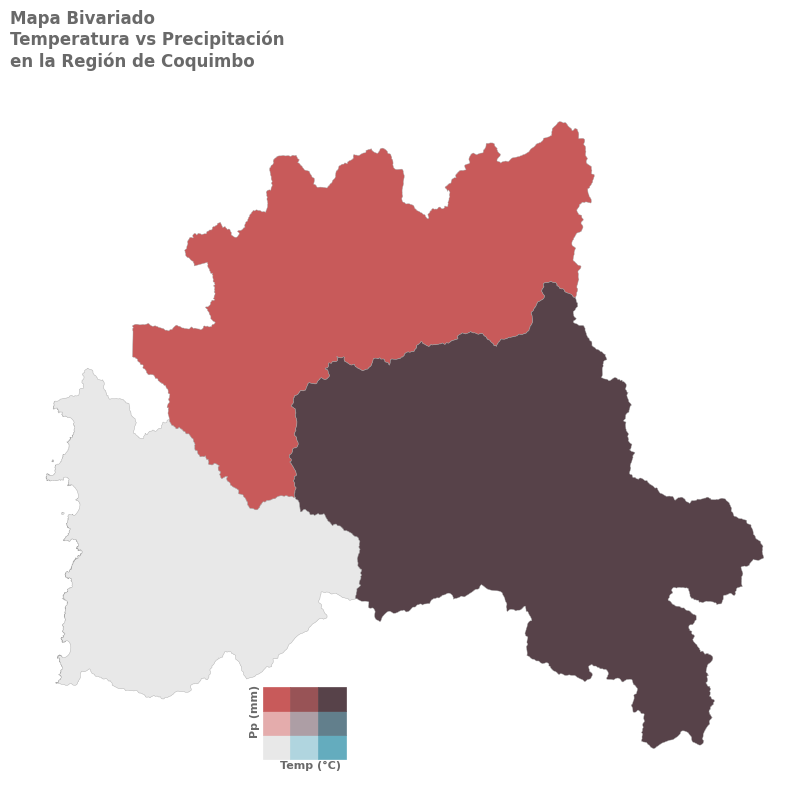

In [381]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import Point

# Crear el colormap bivariado personalizado
colors = ["#e8e8e8", "#e4acac", "#c85a5a", "#b0d5df", "#ad9ea5", "#985356", "#64acbe", "#627f8c", "#574249"]
bivariate_cmap = LinearSegmentedColormap.from_list("bivariate_cmap", colors, N=9)

# Crear categorías para temperatura y precipitación
temp_bins = [20, 30]
precip_bins = [50, 100]
df_estaciones_agrupadas['Temp_Category'] = pd.cut(df_estaciones_agrupadas['Valor_T_max'], bins=[-np.inf] + temp_bins + [np.inf], labels=[0, 0.5, 1])
df_estaciones_agrupadas['Pp_Category'] = pd.cut(df_estaciones_agrupadas['Valor_Pp_mm'], bins=[-np.inf] + precip_bins + [np.inf], labels=[0, 0.5, 1])

# Crear el índice bivariado
df_estaciones_agrupadas['Bivariate_Index'] = df_estaciones_agrupadas['Temp_Category'].astype(float) + df_estaciones_agrupadas['Pp_Category'].astype(float) * 3

# Convertir a GeoDataFrame
df_estaciones_agrupadas['Coordenadas'] = df_estaciones_agrupadas.apply(lambda row: Point(row['long'], row['lat']), axis=1)
gdf_estaciones = gpd.GeoDataFrame(df_estaciones_agrupadas, geometry='Coordenadas', crs="EPSG:4326")

# Asegurarse de que gdf_estaciones tenga el mismo sistema de referencia espacial que gdf_coquimbo_choapa
gdf_estaciones = gdf_estaciones.to_crs(gdf_coquimbo_choapa.crs)

# Filtrar la región de interés (Choapa en Coquimbo)
gdf_coquimbo_choapa = shape_comunas_gdf[(shape_comunas_gdf['codregion'] == 4) & (shape_comunas_gdf['Provincia'] == 'Choapa')].copy()

# Calcular el promedio de Bivariate_Index para cada área en gdf_coquimbo_choapa
gdf_coquimbo_choapa['Bivariate_Index'] = gdf_coquimbo_choapa.geometry.apply(
    lambda poly: gdf_estaciones[gdf_estaciones.geometry.within(poly)]['Bivariate_Index'].mean()
)

# Graficar el mapa base de la provincia coloreado según Bivariate_Index
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_coquimbo_choapa.plot(column='Bivariate_Index', cmap=bivariate_cmap, linewidth=0.3, edgecolor='darkgray', ax=ax)

# Configurar la leyenda bivariada
legend_colors = np.array(colors).reshape(3, 3)
for i in range(3):
    for j in range(3):
        ax.add_patch(plt.Rectangle((0.32 + i * 0.035, 0.03 + j * 0.035), 0.035, 0.035, color=legend_colors[i, j], transform=ax.transAxes, clip_on=False))

# Etiquetas para la leyenda
ax.text(0.38, 0.02, "Temp (°C)", va="center", ha="center", transform=ax.transAxes, fontsize=8, fontweight='bold', color='dimgray')
ax.text(0.31, 0.10, "Pp (mm)", rotation=90, va="center", ha="center", transform=ax.transAxes, fontsize=8, fontweight='bold', color='dimgray')

# Título y ajustes finales
ax.set_axis_off()
ax.set_title("Mapa Bivariado\nTemperatura vs Precipitación\nen la Región de Coquimbo", fontsize=12, fontweight='bold', color='dimgray', loc='left')
plt.tight_layout()
plt.show()



## Mapa Bivariado de Temperatura y Precipitación en la Región de Coquimbo

La visualización presenta un **mapa bivariado** de temperatura y precipitación en la Región de Coquimbo, enfocándose específicamente en las provincias de **Choapa** y **Limarí**. Este mapa utiliza una **escala de colores combinada** para representar simultáneamente las variaciones de dos variables: **temperatura** y **precipitación**.

## Descripción del Mapa y la Escala de Colores

Cada área del mapa está coloreada de acuerdo a un índice bivariado que combina ambas variables:
- **Ejes de la leyenda bivariada**:
  - El **eje horizontal (Temp °C)** muestra el cambio de temperatura de baja (izquierda) a alta (derecha).
  - El **eje vertical (Pp mm)** refleja el cambio en los niveles de precipitación de baja (parte inferior) a alta (parte superior).

- **Colores**:
  - **Tonos rojizos**: Indican áreas con **altas temperaturas y baja precipitación**.
  - **Tonos morados oscuros**: Representan zonas de **baja temperatura y baja precipitación**.
  - **Tonos grisáceos**: Señalan zonas con **bajas temperaturas y baja precipitación**, aunque estos tonos pueden variar en función de los datos disponibles.

## Análisis de las Provincias

### Provincia de Choapa
- La mayor parte de la provincia de Choapa se muestra en tonos **rojizos y morados oscuros**. 
- Esto indica una **tendencia hacia altas temperaturas con baja precipitación en las zonas rojizas**.
- Las áreas en **tonos morados oscuros** sugieren condiciones de **baja temperatura y baja precipitación**.

### Provincia de Limarí

- Al igual que Choapa, Limarí presenta una combinación de **tonos rojizos y morados**, indicando un **gradiente de alta a baja temperatura con baja precipitación**.
- Las características climáticas de esta provincia reflejan un ambiente **semiárido**, con variaciones entre zonas de mayor y menor temperatura.

## Interpretación General y Aplicaciones

Este tipo de visualización es muy útil para:
1. **Identificar patrones climáticos regionales**: Los colores permiten una comprensión rápida de cómo varían la temperatura y la precipitación en cada zona.
2. **Soporte para la gestión de recursos**: Las áreas con baja precipitación y alta temperatura podrían necesitar un enfoque de conservación de agua, mientras que las zonas con variabilidad climática podrían adaptarse a diferentes tipos de cultivo.
3. **Planificación agrícola y ambiental**: El conocimiento de los patrones bivariados permite ajustar las prácticas de cultivo y manejo del suelo según las condiciones climáticas.

En conclusión, el mapa bivariado de la Región de Coquimbo proporciona una herramienta visual para entender cómo se combinan temperatura y precipitación en distintas áreas, con posibles aplicaciones en **gestión de recursos hídricos, agricultura y planificación regional**.


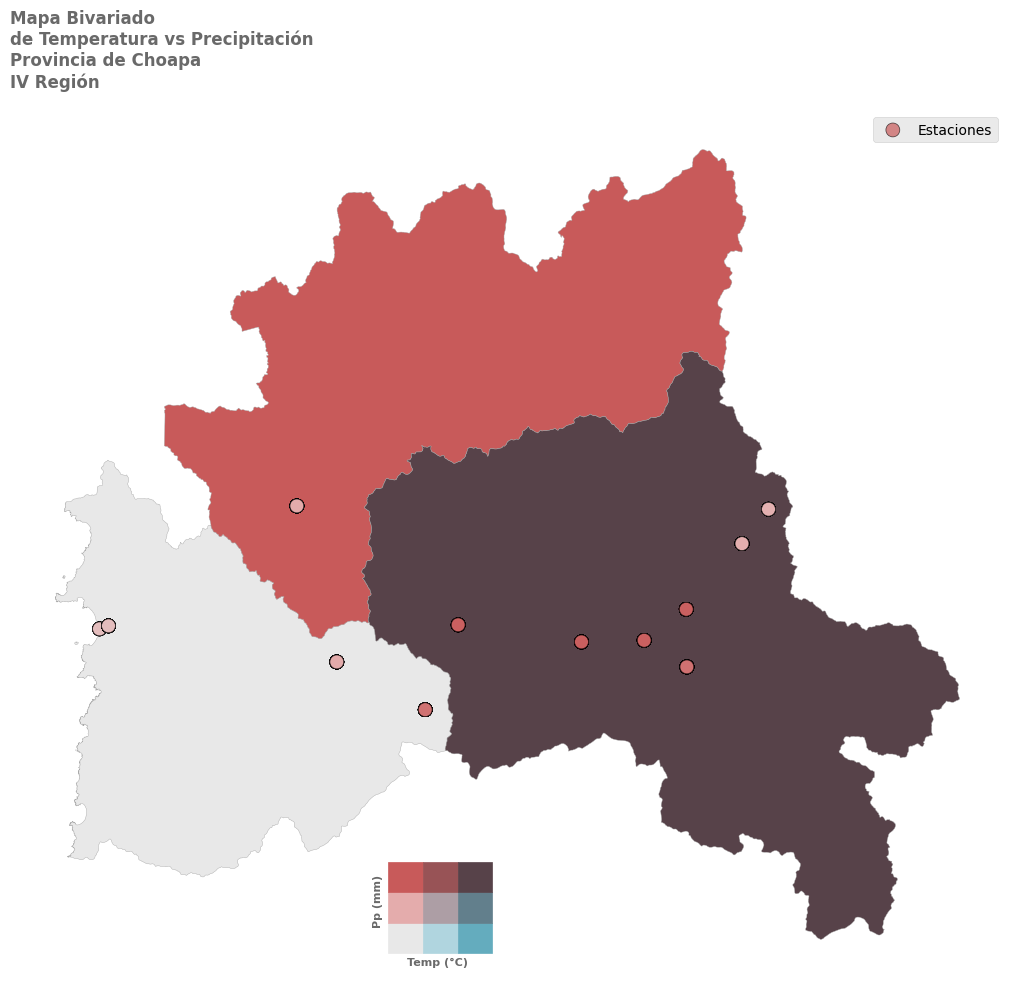

In [382]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import Point

# Crear un colormap bivariado personalizado
colors = ["#e8e8e8", "#e4acac", "#c85a5a", "#b0d5df", "#ad9ea5", "#985356", "#64acbe", "#627f8c", "#574249"]
bivariate_cmap = LinearSegmentedColormap.from_list("bivariate_cmap", colors, N=9)

# Convertir df_estaciones_agrupadas a GeoDataFrame y asegurar el CRS
df_estaciones_agrupadas['Coordenadas'] = df_estaciones_agrupadas.apply(lambda row: Point(row['long'], row['lat']), axis=1)
gdf_estaciones = gpd.GeoDataFrame(df_estaciones_agrupadas, geometry='Coordenadas', crs="EPSG:4326")
gdf_estaciones = gdf_estaciones.to_crs(gdf_coquimbo_choapa.crs)

# Filtrar la región de interés (Choapa en Coquimbo) y hacer una copia
gdf_coquimbo_choapa = shape_comunas_gdf[(shape_comunas_gdf['codregion'] == 4) & (shape_comunas_gdf['Provincia'] == 'Choapa')].copy()

# Calcular el promedio de Bivariate_Index para cada área en gdf_coquimbo_choapa basado en las estaciones contenidas
gdf_coquimbo_choapa['Bivariate_Index'] = gdf_coquimbo_choapa.geometry.apply(
    lambda poly: gdf_estaciones[gdf_estaciones.geometry.within(poly)]['Bivariate_Index'].mean()
)

# Graficar el mapa base de la provincia coloreado según Bivariate_Index
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf_coquimbo_choapa.plot(column='Bivariate_Index', cmap=bivariate_cmap, linewidth=0.3, edgecolor='darkgray', ax=ax)

# Agregar las estaciones como puntos en el mapa sin anotaciones
sc = ax.scatter(
    gdf_estaciones.geometry.x,
    gdf_estaciones.geometry.y,
    c=gdf_estaciones['Bivariate_Index'],
    cmap=bivariate_cmap,
    s=100,  # Tamaño fijo para mejorar visibilidad
    edgecolor='black',
    alpha=0.7,
    label="Estaciones"
)

# Configurar leyenda bivariada en forma de cuadrado en la esquina inferior izquierda
legend_colors = np.array(colors).reshape(3, 3)
for i in range(3):
    for j in range(3):
        ax.add_patch(plt.Rectangle((0.38 + i * 0.035, 0.03 + j * 0.035), 0.035, 0.035, color=legend_colors[i, j], transform=ax.transAxes, clip_on=False))

# Etiquetas para la leyenda en los bordes de la leyenda cuadrada, ajustadas en posición y tamaño
ax.text(0.43, 0.02, "Temp (°C)", va="center", ha="center", transform=ax.transAxes, fontsize=8, fontweight='bold', color='dimgray')
ax.text(0.37, 0.09, "Pp (mm)", rotation=90, va="center", ha="center", transform=ax.transAxes, fontsize=8, fontweight='bold', color='dimgray')

# Título y ajustes finales
ax.set_title("Mapa Bivariado\nde Temperatura vs Precipitación\nProvincia de Choapa\nIV Región", fontsize=12, fontweight='bold', color='dimgray', loc='left')   
ax.set_axis_off()
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()


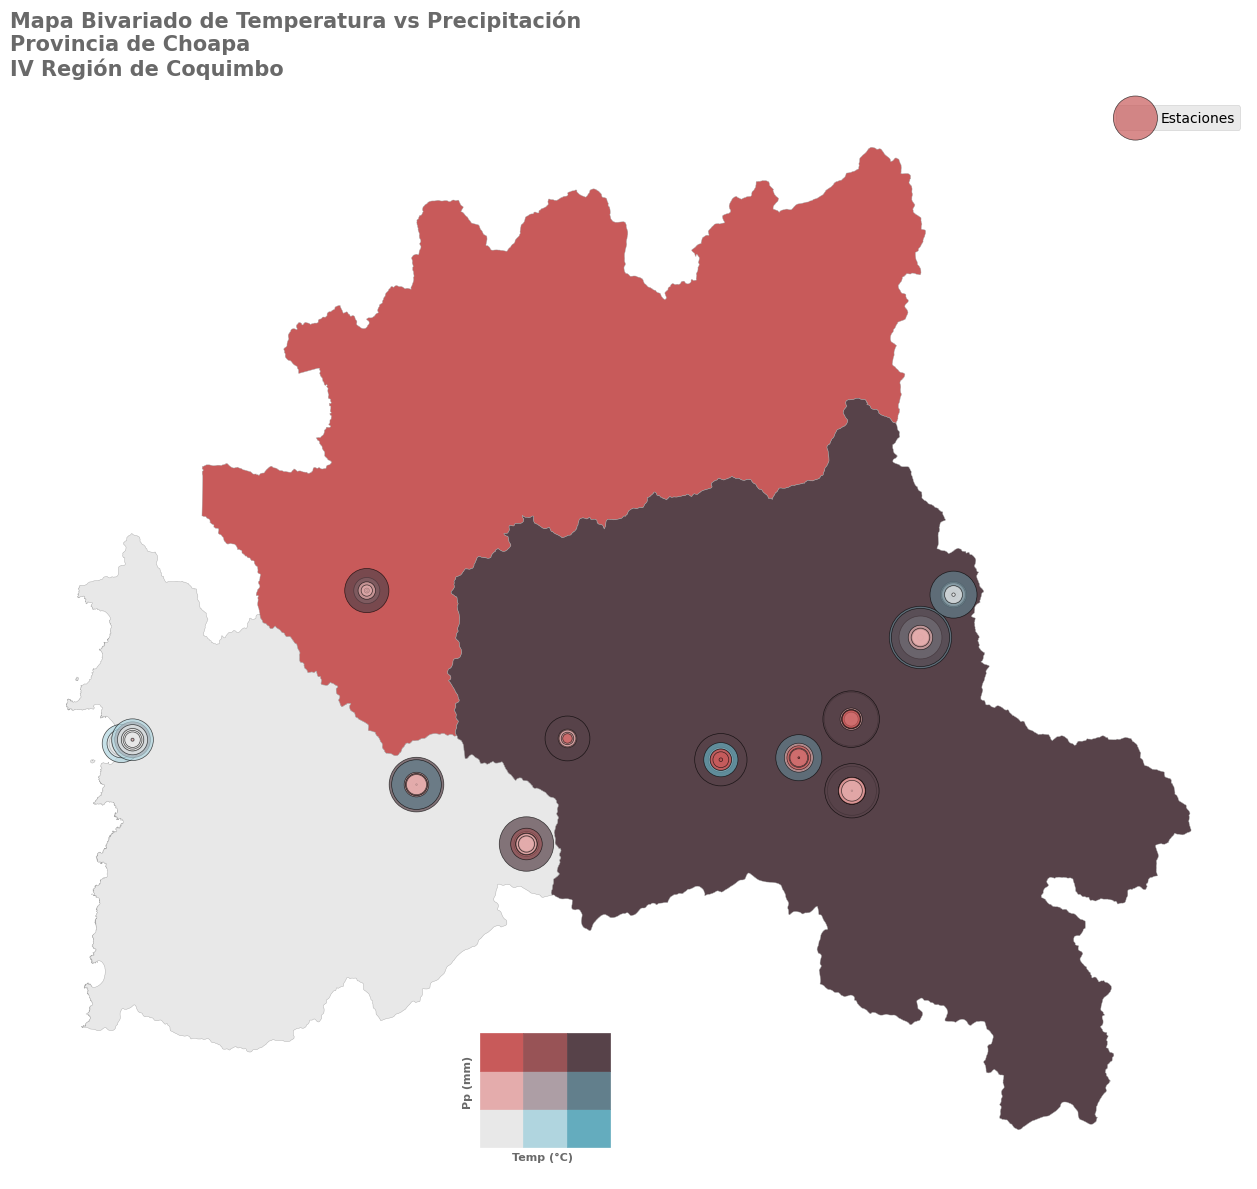

In [383]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import Point

# Crear un colormap bivariado personalizado
colors = ["#e8e8e8", "#e4acac", "#c85a5a", "#b0d5df", "#ad9ea5", "#985356", "#64acbe", "#627f8c", "#574249"]
bivariate_cmap = LinearSegmentedColormap.from_list("bivariate_cmap", colors, N=9)


# Filtrar la región de interés (Choapa en Coquimbo) y hacer una copia
gdf_coquimbo_choapa = shape_comunas_gdf[(shape_comunas_gdf['codregion'] == 4) & (shape_comunas_gdf['Provincia'] == 'Choapa')].copy()

# Convertir df_estaciones_agrupadas a GeoDataFrame y asegurar el CRS
df_estaciones_agrupadas['Coordenadas'] = df_estaciones_agrupadas.apply(lambda row: Point(row['long'], row['lat']), axis=1)
gdf_estaciones = gpd.GeoDataFrame(df_estaciones_agrupadas, geometry='Coordenadas', crs="EPSG:4326")
gdf_estaciones = gdf_estaciones.to_crs(gdf_coquimbo_choapa.crs)

# Calcular el promedio de Bivariate_Index para cada área en gdf_coquimbo_choapa basado en las estaciones contenidas
gdf_coquimbo_choapa['Bivariate_Index'] = gdf_coquimbo_choapa.geometry.apply(
    lambda poly: gdf_estaciones[gdf_estaciones.geometry.within(poly)]['Bivariate_Index'].mean()
)

# Graficar el mapa base de la provincia coloreado según Bivariate_Index
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
gdf_coquimbo_choapa.plot(column='Bivariate_Index', cmap=bivariate_cmap, linewidth=0.3, edgecolor='darkgray', ax=ax)

# Agregar las estaciones como puntos en el mapa
sc = ax.scatter(
    gdf_estaciones.geometry.x,
    gdf_estaciones.geometry.y,
    c=gdf_estaciones['Bivariate_Index'],
    cmap=bivariate_cmap,
    s=gdf_estaciones['Valor_Pp_mm'] * 10,  # Tamaño de punto ajustado por precipitación
    edgecolor='black',
    alpha=0.7,
    label="Estaciones"
)

# Configurar leyenda bivariada en forma de cuadrado en la esquina inferior izquierda
legend_colors = np.array(colors).reshape(3, 3)
for i in range(3):
    for j in range(3):
        ax.add_patch(plt.Rectangle((0.38 + i * 0.035, 0.03 + j * 0.035), 0.035, 0.035, color=legend_colors[i, j], transform=ax.transAxes, clip_on=False))

# Etiquetas para la leyenda en los bordes de la leyenda cuadrada
ax.text(0.43, 0.02, "Temp (°C)", va="center", ha="center", transform=ax.transAxes, fontsize=8, fontweight='bold', color='dimgray')
ax.text(0.37, 0.09, "Pp (mm)", rotation=90, va="center", ha="center", transform=ax.transAxes, fontsize=8, fontweight='bold', color='dimgray')

# Anotaciones en puntos específicos del mapa con ajustes en xytext
ax.annotate(
    "Zona de Alta Temperatura y Baja Precipitación",
    xy=(-71.3, -31.8), xytext=(-71.5, -31.6),
    arrowprops=dict(arrowstyle="->", color='orange', lw=1.5),
    fontsize=10, color='orange', fontweight='bold',
    ha='center', va='center'
)

ax.annotate(
    "Zona de Baja Temperatura y Alta Precipitación",
    xy=(-71.5, -32.0), xytext=(-71.7, -32.2),
    arrowprops=dict(arrowstyle="->", color='blue', lw=1.5),
    fontsize=10, color='blue', fontweight='bold',
    ha='center', va='center'
)

# Título y ajustes finales
ax.set_title("Mapa Bivariado de Temperatura vs Precipitación\nProvincia de Choapa\nIV Región de Coquimbo", fontsize=15, fontweight='bold', color='dimgray', loc='left')    
ax.set_axis_off()
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()


## Mapa Bivariado de Temperatura y Precipitación en la Provincia de Choapa, IV Región de Coquimbo

Este mapa bivariado visualiza la relación entre la **temperatura** y la **precipitación** en la **Provincia de Choapa**. La leyenda bivariada en la parte inferior derecha muestra cómo los colores en el mapa representan combinaciones de niveles de temperatura y precipitación, proporcionando una comprensión visual rápida de las condiciones climáticas regionales.

## Escala de Colores y Significado
La escala de colores combina dos variables climáticas clave:
- **Eje Horizontal (Temp °C)**: representa el cambio en temperatura de **baja a alta**, con tonos que van de gris a rojo.
- **Eje Vertical (Pp mm)**: representa el cambio en precipitación de **baja a alta**, con tonos de gris a azul.

Cada color en el mapa indica una combinación de estas variables, lo que permite identificar rápidamente áreas con características climáticas particulares.

### Desglose por Color:
- **Tonos Rojizos**: Representan áreas con **alta temperatura y baja precipitación**. Estas zonas suelen tener condiciones semiáridas y pueden experimentar sequías estacionales.
- **Tonos Morados Oscuros**: Indican áreas con **baja temperatura y baja precipitación**. Estas condiciones son típicas de zonas semiáridas o áridas, donde el agua es un recurso limitado y la vegetación es escasa.
- **Tonos Azulados**: Zonas de **alta precipitación y baja temperatura**, aunque menos comunes en la provincia, se observan en puntos específicos marcados por estaciones.

## Distribución de las Estaciones
Las **estaciones meteorológicas** están representadas en el mapa como círculos con variaciones en tamaño y color según los niveles de temperatura y precipitación registrados en cada ubicación:
- El **tamaño** del círculo corresponde a un valor relevante (la media de precipitación anual), lo que permite identificar visualmente las estaciones con mayor o menor acumulación de precipitaciones.
- Las estaciones ayudan a reforzar el análisis bivariado en áreas específicas de la provincia, proporcionando datos observacionales que respaldan la distribución de colores en el mapa.

### Observaciones Clave:
1. **Zona Norte y Centro de Choapa (Tonos Rojizos)**: En esta área se observa una predominancia de tonos rojizos, lo cual indica que las temperaturas son altas mientras que la precipitación es baja. Este patrón es consistente con un clima semiárido, donde el agua es escasa, lo cual podría influir en la planificación agrícola y la gestión de recursos hídricos.
  
2. **Zona Sur y Este de Choapa (Tonos Morados Oscuros)**: Esta área muestra condiciones de **baja temperatura y baja precipitación**, características de un clima frío y seco. Las estaciones en esta área corroboran la escasez de precipitaciones y las bajas temperaturas, alineándose con las expectativas de un clima árido.

## Aplicaciones y Conclusiones
Este mapa bivariado ofrece una herramienta valiosa para:
- **Gestión de Recursos Hídricos**: Identificar zonas de alta temperatura y baja precipitación, donde se requerirán estrategias de conservación de agua y uso eficiente.
- **Planificación Agrícola**: Las condiciones de temperatura y precipitación influencian el tipo de cultivos viables y la planificación de riego en la región.
- **Monitoreo Ambiental**: La ausencia de datos en ciertas áreas subraya la necesidad de ampliar la red de estaciones meteorológicas para obtener un panorama más completo del clima en Choapa.

En conclusión, el mapa bivariado de la Provincia de Choapa proporciona una visión integral de las **variaciones climáticas** en temperatura y precipitación, destacando áreas de interés particular para la **gestión climática, agrícola y ambiental**.
